### Stage 4: Full evaluation of cross validated models

this notebook is only to visualize previously collected results, which should be over the whole dataset and also per split of the dataset.
Good. A previous notebook does the actual results collection. Nice.


so we have in domain and out of domain results. we have results for each cross validated split. Noice.

#### Loading all the spreadsheet data

In [1]:
import os
import torch
import numpy as np
import proplot as pplt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from natsort import natsorted

In [2]:
import matplotlib as mpl
cmap = plt.get_cmap('538')#mpl.colormaps['Set2']

In [3]:
in_domain_results = os.listdir("../results/cross_validated_results/in_domain_results")
out_domain_results = os.listdir("../results/cross_validated_results/out_domain_results")

in_domain_results = [i for i in in_domain_results if "individual_" in i]
out_domain_results = [i for i in out_domain_results if "individual_" in i]

In [4]:
UNCERTAINTY_TYPES = [
    "SEnt",
    "MC-Drop",
    "Ens",
    "Evid",
    "Ind",
    "P-Unet",
    "SSN",
    "SSN-Ens",
    "SEnt (nnUNet)",
    "SEnt (nnUNet 3D)",
    "SSN (nnUNet)",
    "SSN-Ens (nnUNet)",
    
    # "NNUNET",
    # "NNUNETSSN",
    # "NNUNETSSNV1",
    # "NNUNETSSNV4",
    # "NNUNETSSNV5",
    # "NNUNET2D",
    # "NNUNET2D_NOAUG",
    # "simpleNNUNET_NOAUG"
    # "NNUNETS50",
    # "NNUNETSA",
    # "NNUNET25ND",
    # "NNUNET50ND",
]

In [5]:
def convert_files_to_large_df(folder, filenames, excluded_rows = []):
    dfs = []
    for fn in natsorted(filenames):
        df = pd.read_csv(os.path.join(folder, fn))
        if "_SsnEnsNnunet2DX2" in fn:
            uncertainty_type = "SSN-Ens (nnUNet)"
        elif "_SsnX2Nnunet2D" in fn:
            uncertainty_type = "SSN (nnUNet)"
        elif "_nnunet2D" in fn:
            uncertainty_type = "SEnt (nnUNet)"
        elif "_nnunet3D" in fn:
            uncertainty_type = "SEnt (nnUNet 3D)"
        elif "_evidential_b" in fn:
            uncertainty_type = "Evid"
        elif "_deterministic_b" in fn:
            uncertainty_type = "SEnt"
        elif "_ind_b" in fn:
            uncertainty_type = "Ind"
        elif "_punet_b" in fn:
            uncertainty_type = "P-Unet"
        elif "_ens_b" in fn and "ssn" not in fn:
            uncertainty_type = "Ens"
        elif "_mc_drop_b" in fn:
            uncertainty_type = "MC-Drop"
        elif "_ssn_ens_b" in fn:
            uncertainty_type = "SSN-Ens"
        elif "_ssn_b" in fn:
            uncertainty_type = "SSN"
        else:
            print("uncertainty type unclear for ", fn)
            continue
            
        cv_fold = fn.split("_cv")[1][0]
        
        df['uncertainty_type'] = [uncertainty_type for _ in range(len(df))]
        df['cv_fold'] = [cv_fold for _ in range(len(df))]
        if len(excluded_rows) > 0:
            df = df.drop(index=excluded_rows, inplace=False)
        
        dfs.append(df)
    
    return pd.concat(dfs, ignore_index=False)

In [6]:
in_excluded_rows = []
in_domain_df = convert_files_to_large_df("../results/cross_validated_results/in_domain_results", in_domain_results, excluded_rows=in_excluded_rows)

In [7]:
in_domain_df['uncertainty_type'].value_counts()

uncertainty_type
SEnt                500
Ens                 500
Evid                500
Ind                 500
MC-Drop             500
P-Unet              500
SSN                 500
SSN-Ens             500
SSN-Ens (nnUNet)    250
SSN (nnUNet)        250
SEnt (nnUNet)       250
Name: count, dtype: int64

In [8]:
out_domain_df = convert_files_to_large_df("../results/cross_validated_results/out_domain_results", out_domain_results)

uncertainty type unclear for  UNCERT_TYPE_ssnEnsNnunet2D_base_model_type_ssnEnsNnunet2D0_cv1individual_stats.csv.csv
uncertainty type unclear for  UNCERT_TYPE_ssnEnsNnunet2D_base_model_type_ssnEnsNnunet2D0_cv3individual_stats.csv.csv
uncertainty type unclear for  UNCERT_TYPE_ssnEnsNnunet2D_base_model_type_ssnEnsNnunet2D0_cv4individual_stats.csv.csv
uncertainty type unclear for  UNCERT_TYPE_ssnNnunet2D_base_model_type_ssnNnunet2D0_cv0individual_stats.csv.csv
uncertainty type unclear for  UNCERT_TYPE_ssnNnunet2D_base_model_type_ssnNnunet2D0_cv1individual_stats.csv.csv
uncertainty type unclear for  UNCERT_TYPE_ssnNnunet2D_base_model_type_ssnNnunet2D0_cv2individual_stats.csv.csv
uncertainty type unclear for  UNCERT_TYPE_ssnNnunet2D_base_model_type_ssnNnunet2D0_cv3individual_stats.csv.csv
uncertainty type unclear for  UNCERT_TYPE_ssnNnunet2D_base_model_type_ssnNnunet2D0_cv4individual_stats.csv.csv
uncertainty type unclear for  UNCERT_TYPE_ssnNnunet2D_base_model_type_ssnNnunet2D0_cv5individu

In [9]:
out_domain_df['uncertainty_type'].value_counts()

uncertainty_type
SSN                 780
SEnt                720
Ens                 720
Evid                720
Ind                 720
MC-Drop             720
P-Unet              720
SSN-Ens             720
SSN-Ens (nnUNet)    360
SSN (nnUNet)        360
SEnt (nnUNet)       360
SEnt (nnUNet 3D)    360
Name: count, dtype: int64

In [10]:
out_domain_df.keys()

Index(['Unnamed: 0', 'dice', 'hd95', 'avd', 'recall', 'f1', 'rmse', 'gt_vols',
       'best_dice', 'best_avd',
       ...
       'voxelwise_tfpr_0.90', 'voxelwise_tfpr_0.91', 'voxelwise_tfpr_0.92',
       'voxelwise_tfpr_0.93', 'voxelwise_tfpr_0.94', 'voxelwise_tfpr_0.95',
       'voxelwise_tfpr_0.96', 'voxelwise_tfpr_0.97', 'voxelwise_tfpr_0.98',
       'voxelwise_tfpr_0.99'],
      dtype='object', length=1035)

### performance per fold

comment that SSN Ens generalizes well due to its improved performance on outliers across both datasets.

In [11]:
model_order = [
    "SEnt",
    "MC-Drop",
    "Ens",
    "Evid",
    "Ind",
    "P-Unet",
    "SSN",
    "SSN-Ens",
    "SEnt (nnUNet)",
    # "SEnt (nnUNet 3D)",
    "SSN (nnUNet)",
    "SSN-Ens (nnUNet)",
]

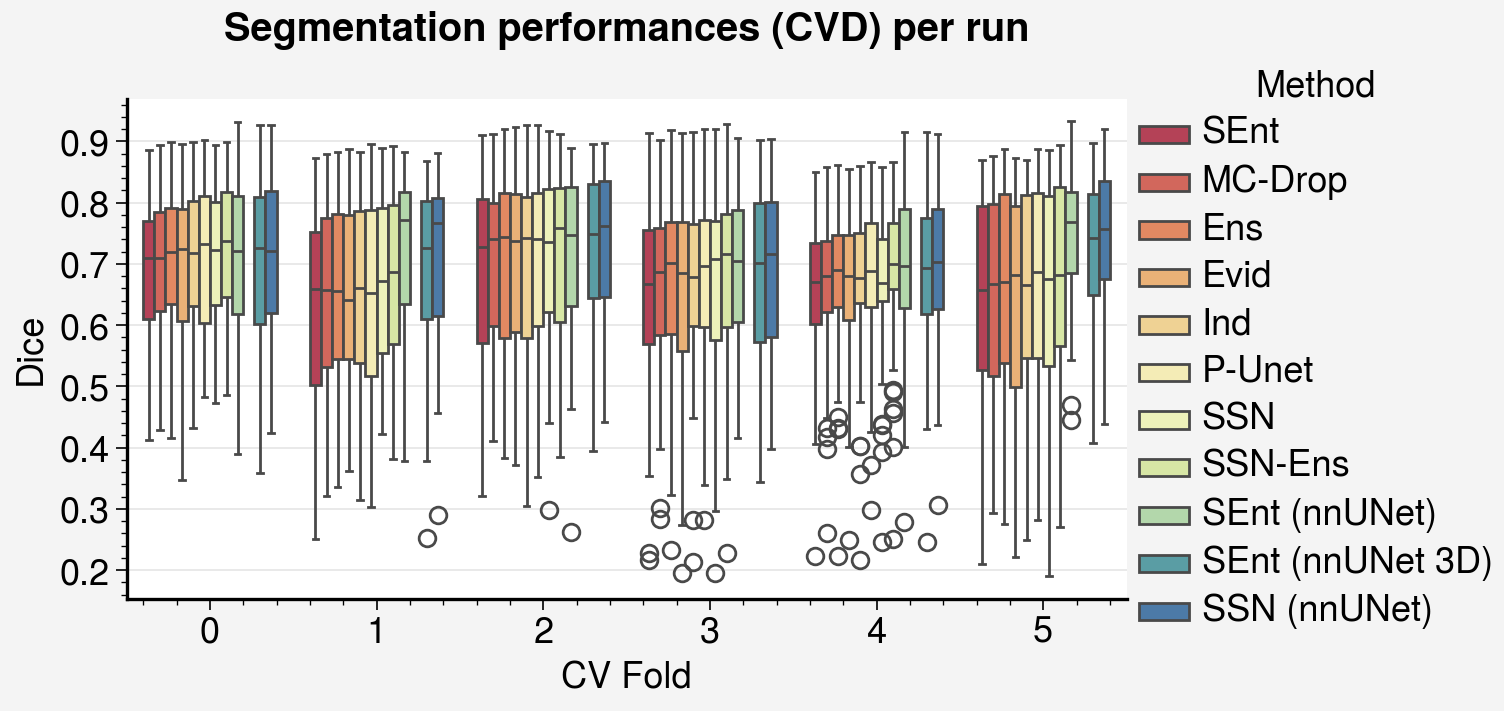

In [26]:
fig, ax = pplt.subplots(nrows=1, ncols=1, refwidth="40em", refheight="20em", fontsize=13)
sns.boxplot(x='cv_fold', y='dice', data=in_domain_df.reset_index(), hue='uncertainty_type', palette='Spectral', ax=ax, legend=False,
            hue_order=model_order)
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(loc="right", title="Method", ncols=1, handles=ax.artists[::6], labels=model_order, title_fontsize=13, frame=False)
plt.setp(legend.get_texts(), fontsize=13)
ax.format(xlabel='CV Fold', ylabel="Dice", suptitle="Segmentation performances (CVD) per run")
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_linewidth(1.2)  # Thicker bottom spine
ax.spines['left'].set_linewidth(1.2)  # Thicker left spine
fig.save("plots_output/cv_fold_dice_indomain.pdf")

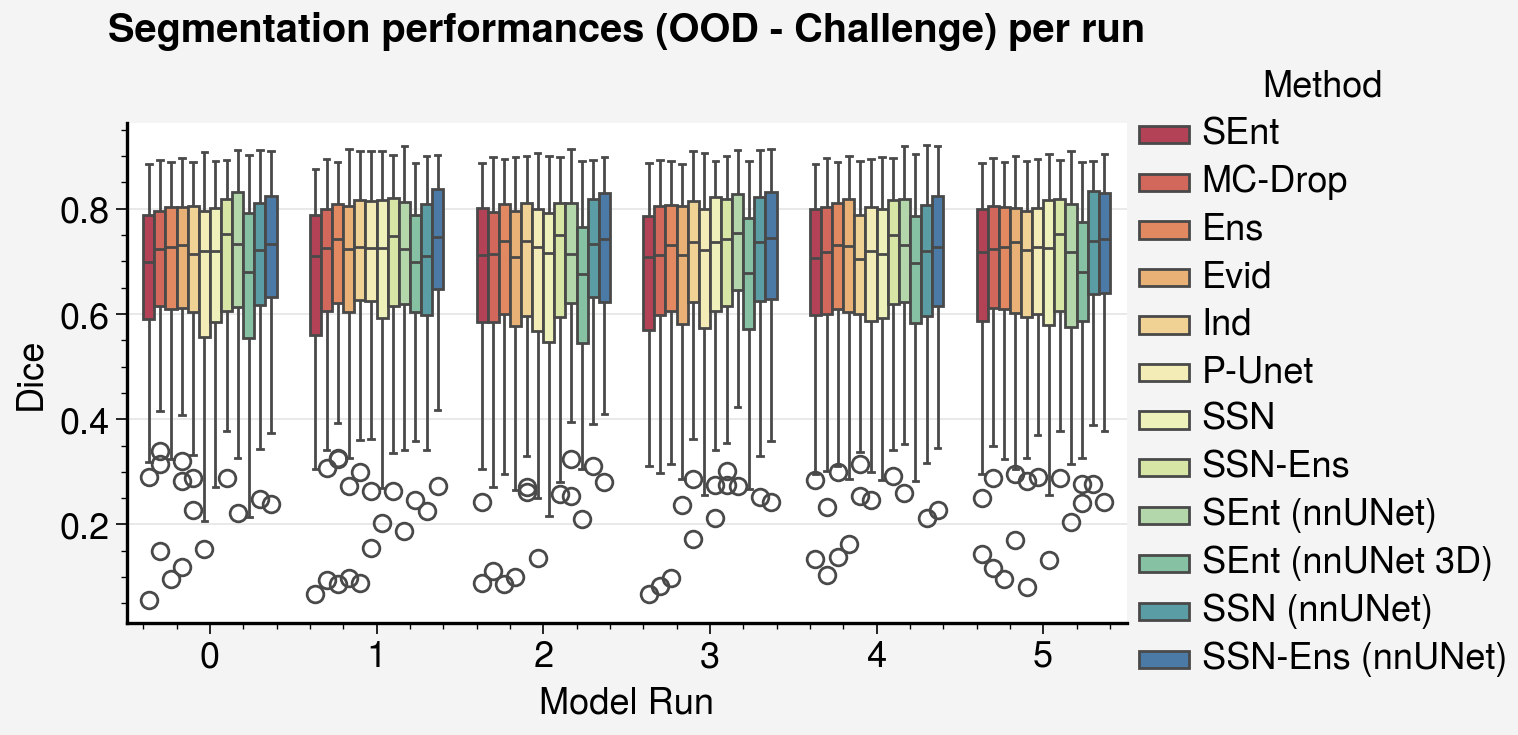

In [27]:
fig, ax = pplt.subplots(nrows=1, ncols=1, refwidth="40em", refheight="20em", fontsize=13)
sns.boxplot(x='cv_fold', y='dice', data=out_domain_df.reset_index(), hue='uncertainty_type', palette='Spectral', ax=ax, legend=False,
            hue_order=model_order)
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(loc="right", title="Method", ncols=1, handles=ax.artists[::6], labels=model_order, title_fontsize=13, frame=False)
plt.setp(legend.get_texts(), fontsize=13)
ax.format(xlabel='Model Run', ylabel="Dice", suptitle="Segmentation performances (OOD - Challenge) per run")
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_linewidth(1.2)  # Thicker bottom spine
ax.spines['left'].set_linewidth(1.2)  # Thicker left spine
fig.save("plots_output/cv_fold_dice_outdomain.pdf")

In [13]:
pd.set_option('display.float_format',
      lambda x: '{:,.3f}'.format(x) if abs(x) < 2 else '{:,.3}'.format(x))

In [82]:
from scipy.stats import t as t_distribution
from scipy.stats import bootstrap

def mean_statistic(data, axis):
    return np.mean(data, axis=axis)

def mean_and_95_conf_over_cvfold(df, metric, return_sem=False):
    cv_scores = df.groupby(['uncertainty_type', 'cv_fold'])[metric].mean().groupby('uncertainty_type')
    mean = cv_scores.mean().rename(f"{metric} mean", axis='index')
    std = cv_scores.std(ddof=1)
    size = cv_scores.size()
    sem_value = std / (np.sqrt(size))
    
    confidence_level = 0.95
    degrees_of_freedom = size - 1
    # margin_of_error = t_distribution.ppf((1 + confidence_level) / 2, degrees_of_freedom) * sem_value
    margin_of_error = 1.96 * sem_value
    margin_of_error = margin_of_error.rename(f"{metric} 95%")
    sem_value  = sem_value.rename(f"{metric} 95%")
    confidence_interval = (mean - margin_of_error, mean + margin_of_error)
    
    
    if return_sem:
        data_out = pd.concat([mean, sem_value], axis=1)#, confidence_interval[0], confidence_interval[1]], axis=1)
    else:
        data_out = pd.concat([mean, margin_of_error], axis=1)
        
    ci_data_values = []
    for utype in data_out.index.values:
        vs = df[df['uncertainty_type'] == utype].groupby(['Unnamed: 0'])[metric].mean().values
        vs = vs[~np.isnan(vs)]
        if len(vs) < 10:
            ci_data_values.append(np.nan)
            continue
        ci = bootstrap((vs,), mean_statistic, confidence_level=0.95, n_resamples=1000, method='percentile')
        ci = (ci.__dict__['confidence_interval'][1] - ci.__dict__['confidence_interval'][0]) / 2
        ci_data_values.append(ci)
    
    data_out[f"{metric} data95"] = ci_data_values
    
    return data_out

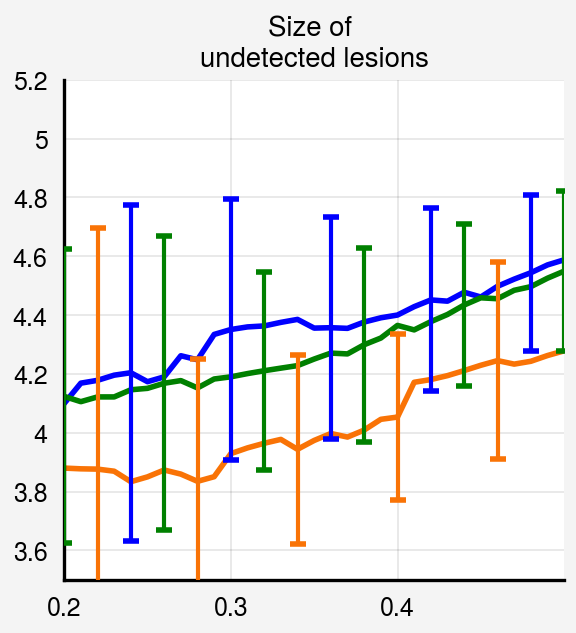

In [83]:
fig, ax = pplt.subplots(ncols=1, nrows=1)

metric = "mean_size_missed_lesions3d_all"
tmetric_df = plot_metric_for_all_thresholds_95(
    ax, out_domain_df, metric, ax_title="Size of \nundetected lesions", ylabel=False,
    marker_point=None, xlim=(0.2,0.5), ylim=(3.5, 5.2), variance='data', fill=False, uncertainty_types=nn_utypes
)

In [61]:
a, vs = mean_and_95_conf_over_cvfold(out_domain_df, 'mean_size_missed_lesions3d_all_0.30', return_vs=True)
a

mean_size_missed_lesions3d_all_0.30 mean   
uncertainty_type                                             
Ens                                                    4.5  \
Evid                                                   4.8   
Ind                                                    4.5   
MC-Drop                                                4.6   
P-Unet                                                 4.6   
SEnt                                                   4.9   
SEnt (nnUNet 3D)                                       4.3   
SEnt (nnUNet)                                          4.4   
SSN                                                    4.4   
SSN (nnUNet)                                           4.2   
SSN-Ens                                                4.2   
SSN-Ens (nnUNet)                                       3.9   

                  mean_size_missed_lesions3d_all_0.30 95%   
uncertainty_type                                            
Ens                                                  0.03  \
Evid                                                 0.19   
Ind                                                  0.12   
MC-Drop                                              0.10   
P-Unet                                               0.09   
SEnt                                                 0.11   
SEnt (nnUNet 3D)                                     0.29   
SEnt (nnUNet)                                        0.21   
SSN                                                  0.14   
SSN (nnUNet)                                         0.11   
SSN-Ens                                              0.06   
SSN-Ens (nnUNet)                                     0.21   

                  mean_size_missed_lesions3d_all_0.30 data95  
uncertainty_type                                              
Ens                                                     0.16  
Evid                                                    0.21  
Ind                                                      NaN  
MC-Drop                                                 0.22  
P-Unet                                                  0.25  
SEnt                                                    0.24  
SEnt (nnUNet 3D)                                        0.33  
SEnt (nnUNet)                                            NaN  
SSN                                                     0.21  
SSN (nnUNet)                                             NaN  
SSN-Ens                                                 0.15  
SSN-Ens (nnUNet)                                         NaN

In [64]:
vs[np.isnan(vs)]

array([nan])

In [54]:
out_domain_df.keys()[300:]

Index(['UEO_0.66', 'UEO_0.67', 'UEO_0.68', 'UEO_0.69',
       'mean_missed_area3d_all_0.00',
       'mean_cov_mean_missed_lesions3d_all_0.00',
       'mean_size_missed_lesions3d_all_0.00', 'prop_lesions_missed3d_all_0.00',
       'mean_missed_area3d_all_0.01',
       'mean_cov_mean_missed_lesions3d_all_0.01',
       ...
       'voxelwise_tfpr_0.90', 'voxelwise_tfpr_0.91', 'voxelwise_tfpr_0.92',
       'voxelwise_tfpr_0.93', 'voxelwise_tfpr_0.94', 'voxelwise_tfpr_0.95',
       'voxelwise_tfpr_0.96', 'voxelwise_tfpr_0.97', 'voxelwise_tfpr_0.98',
       'voxelwise_tfpr_0.99'],
      dtype='object', length=735)

In [20]:
do = mean_and_95_conf_over_cvfold(out_domain_df, "f1", return_sem=False)
do[do.index == "Ens"]

f1 mean  f1 95%  f1 data95
uncertainty_type                            
Ens                 0.510   0.003      0.022

In [21]:
t_distribution.ppf((1+0.95) / 2, 60)

2.0002978210582616

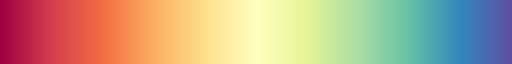

In [22]:
pplt.Colormap('Spectral')

In [23]:
cmap_continuous = pplt.Colormap('Spectral')
colours = cmap(np.linspace(0, 1, 8))

In [24]:
UNCERTAINTY_COLOURS = {
    'SEnt': 'gray5',
    'MC-Drop': 'orange5',
    'Evid': 'yellow5',
    'Ens': 'red5',
    'Ind': 'blue green',
    'P-Unet': 'lime5',
    'SSN': 'indigo5',
    'SSN-Ens': 'grape9',
    # 'NNUNET': 'black',
    # 'NNUNETSSN': 'blue',
    # 'NNUNETSSNV1': 'green',
    # 'NNUNETSSNV4': 'orange',
    # 'NNUNETSSNV5': 'pink',
    # 'NNUNET2D':'red',
    # 'NNUNET2D_NOAUG':'black',
    # "simpleNNUNET_NOAUG":'black',
    # "NNUNET25ND":'orange',
    # "NNUNET50ND":'gray',
    'SEnt (nnUNet)':'blue',
    'SEnt (nnUNet 3D)':'black',
    'SSN (nnUNet)':'green',
    'SSN-Ens (nnUNet)':'orange',
    
}

In [25]:
model_order

['SEnt',
 'MC-Drop',
 'Ens',
 'Evid',
 'Ind',
 'P-Unet',
 'SSN',
 'SSN-Ens',
 'SEnt (nnUNet)',
 'SSN (nnUNet)',
 'SSN-Ens (nnUNet)']

In [26]:
s_utypes = ['SEnt',
 'MC-Drop',
 'Ens',
 'Evid',
 'Ind',
 'P-Unet',
 'SSN',
 'SSN-Ens',
           ]

nn_utypes = ['SEnt (nnUNet)',
 'SSN (nnUNet)',
 'SSN-Ens (nnUNet)']

### UEO and patchwise metrics etc

In [27]:
def UEO_at_point(df, get_max=True, at_value=None, max_value=0.7):
    thresholds = np.arange(0, max_value, 0.01)
    column_names = []
    threshold_means = []
    for t in thresholds:
        threshold_means.append(df.groupby(['uncertainty_type', 'cv_fold'])[f"UEO_{t:.2f}"].mean())
        column_names.append(f"UEO_{t:.2f}")
    column_names = np.array(column_names)
    threshold_means = pd.concat(threshold_means, axis=1)
    threshold_cv_means = threshold_means.groupby(['uncertainty_type']).mean()
    
    # find the value on the mean UEO curve that is closest to the target value
    threshold_cv_means = threshold_means.groupby(['uncertainty_type']).mean()
    closest_idx = (threshold_cv_means - at_value).abs().apply(np.argmin, axis=1)
    closest_value = threshold_cv_means.values[np.arange(len(threshold_cv_means)), closest_idx.values]
    
    result_df = pd.DataFrame(closest_idx)
    result_df['ueo_value'] = closest_value
    result_df['threshold'] = thresholds[closest_idx.values]
    
    return result_df
    

In [28]:
def plot_metric_for_all_thresholds_95(ax, df, metric, ylim=None, xlim=None, title="", ax_title="", marker_point=None, ylabel=None, uncertainty_types=UNCERTAINTY_TYPES, variance='model', fill=True, xlabel=False):
    thresholds = np.arange(0, 0.7, 0.01)
    t_map = {}
    dfs = []
    # get a mean and conf interval for these curves.
    for idx, tau in enumerate(thresholds):
        dfs.append(mean_and_95_conf_over_cvfold(df, f"{metric}_{tau:.2f}", return_sem=False))
        t_map[tau] = idx
    tmetric_df = pd.concat(dfs, axis=1)
    
    mean_cols = [f"{metric}_{tau:.2f} mean" for tau in thresholds]
    conf_cols = [f"{metric}_{tau:.2f} 95%" for tau in thresholds]
    dataconf_cols = [f"{metric}_{tau:.2f} data95" for tau in thresholds]
    
    for ui, key in enumerate(uncertainty_types):
        try:
            mean = tmetric_df[mean_cols].loc[key].values
        except KeyError:
            continue
        if variance == 'model':
            conf = tmetric_df[conf_cols].loc[key].values
        elif variance == 'data':
            conf = tmetric_df[dataconf_cols].loc[key].values
        else:
            raise ValueError(f"variance must be one of: [ model | data ], not: {variance}")
        # sns.lineplot(x=thresholds.tolist(), y=mean.tolist(), label=key, color=UNCERTAINTY_COLOURS[key], ax=ax, linewidth=3)
        ax.plot(thresholds, mean, label=key, color=UNCERTAINTY_COLOURS[key], linewidth=2)
        
        if fill:
            ax.fill_between(thresholds.tolist(), (mean - conf).tolist(), (mean + conf).tolist(), alpha=0.3, color=UNCERTAINTY_COLOURS[key])
        else:
            offset = 2*ui  
            step = 6   
            indices = np.arange(offset, len(mean), step)
            ax.errorbar(thresholds[indices].tolist(), mean[indices].tolist(), yerr=conf[indices].tolist(),
                        color=UNCERTAINTY_COLOURS[key], zorder=3, linestyle='none',
                       elinewidth=1.5, capsize=3, capthick=2)
        
        if marker_point is not None:
            try:
                thresh = marker_point.loc[key]['threshold']
                ax.scatter(thresh, mean[int(marker_point.loc[key][0])], s=60, 
                       color=UNCERTAINTY_COLOURS[key], zorder=3, edgecolors='black')
                
            except KeyError:
                continue
    
    # format spines
    ax.spines[['top','right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_linewidth(1.2)

    # Reformat x-axis label and tick labels
    if xlabel:
        ax.set_xlabel(r"uncertainty threshold $\tau$", labelpad=10) # No need for an axis label
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelrotation=0)
    ax.xaxis.set_ticks(np.arange(xlim[0], xlim[1], 0.1))
    # ax.yaxis.set_ticks(np.arange(ylim[0], ylim[1], 0.05))

    # Reformat y-axis
    if ylabel != False:
        if ylabel == None:
            ylabel = metric
        ax.set_ylabel(ylabel, labelpad=10)
        ax.yaxis.set_label_position("left")
    ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)

    ax.set_title(ax_title)
    ax.minorticks_off()
    
    # remove the little x tick line
    ax.tick_params(axis='x', which='both', bottom=False, top=False)
    return 

In [38]:
dpi = 96

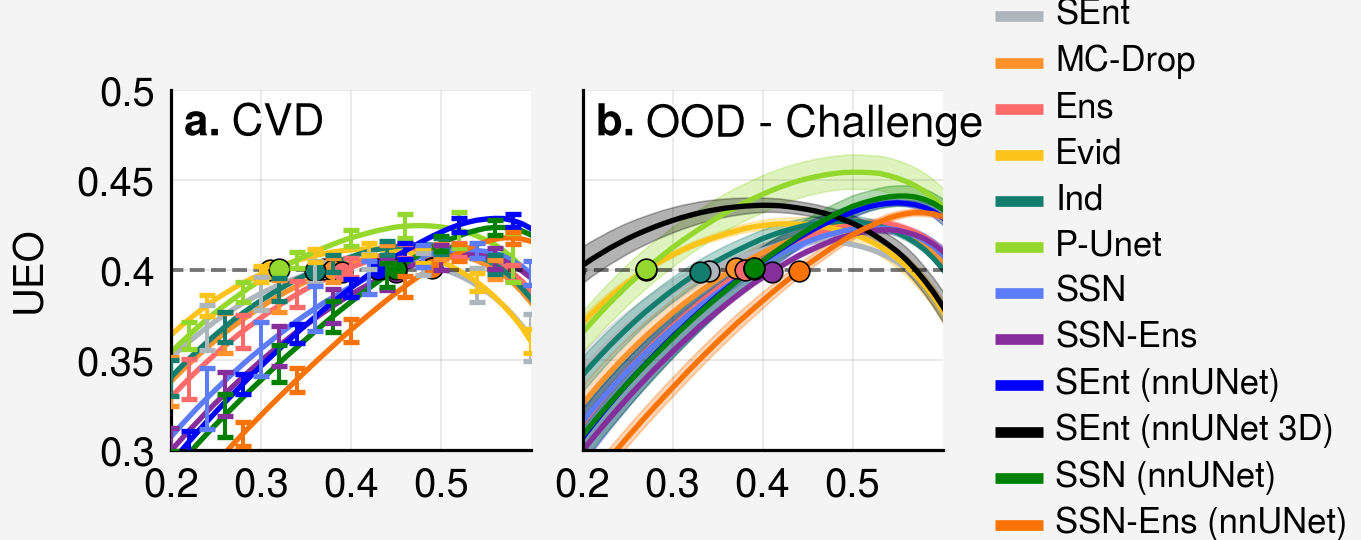

In [309]:
at_value = 0.4
dpi = 96
metric = "UEO"
# title = "Uncertainty Error Overlap (UEO) for each method"
fig, axs = pplt.subplots(ncols=2, refwidth="15em", dpi=dpi)
plot_metric_for_all_thresholds_95(axs[0], in_domain_df, metric, 
                        marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), ylim=(0.3, 0.5), xlim=(0.2, 0.6), ax_title="CVD", fill=False)


plot_metric_for_all_thresholds_95(axs[1], out_domain_df, metric,
                                  marker_point=UEO_at_point(out_domain_df, get_max=False, at_value=at_value, max_value=0.5), ylim=(0.3, 0.5), xlim=(0.2, 0.6), ax_title="OOD - Challenge")

legend = axs[1].legend(loc='right', ncols=1, frame=False, linewidth=4)
plt.setp(legend.get_texts(), fontsize=13)

for ax in axs:
    ax.plot([0, 1], [0.4, 0.4], linestyle='--', color='black', alpha=0.5)

axs.format(fontsize=15, titleloc='ul', abc='a.', abcloc='ul')
# fig.save("plots_output/UEO.pdf")
plt.show()

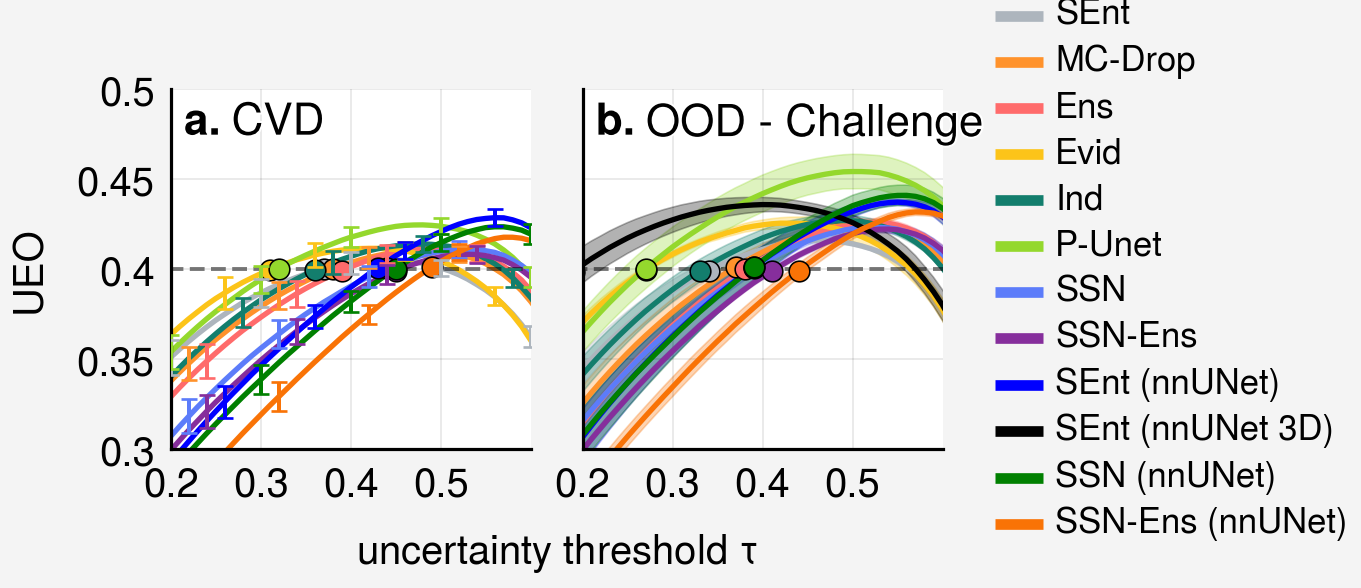

In [278]:
at_value = 0.4
dpi = 96
metric = "UEO"
# title = "Uncertainty Error Overlap (UEO) for each method"
fig, axs = pplt.subplots(ncols=2, refwidth="15em", dpi=dpi)
plot_metric_for_all_thresholds_95(axs[0], in_domain_df, metric, 
                        marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), ylim=(0.3, 0.5), xlim=(0.2, 0.6), ax_title="CVD", variance='data', fill=False)


plot_metric_for_all_thresholds_95(axs[1], out_domain_df, metric,
                                  marker_point=UEO_at_point(out_domain_df, get_max=False, at_value=at_value, max_value=0.5), ylim=(0.3, 0.5), xlim=(0.2, 0.6), ax_title="OOD - Challenge")

legend = axs[1].legend(loc='right', ncols=1, frame=False, linewidth=4)
plt.setp(legend.get_texts(), fontsize=13)

for ax in axs:
    ax.plot([0, 1], [0.4, 0.4], linestyle='--', color='black', alpha=0.5)

axs.format(fontsize=15, titleloc='ul', abc='a.', abcloc='ul')
# fig.save("plots_output/UEO.pdf")
plt.show()

In [30]:
def plot_2conf_metric_thresholds_95(ax, df, metric, ylim=None, xlim=None, title="", ax_title="", marker_point=None, ylabel=None):
    thresholds = np.arange(0, 0.7, 0.01)
    t_map = {}
    dfs = []
    # get a mean and conf interval for these curves.
    for idx, tau in enumerate(thresholds):
        dfs.append(mean_and_95_conf_over_cvfold(df, f"{metric}_{tau:.2f}", return_sem=False))
        t_map[tau] = idx
    tmetric_df = pd.concat(dfs, axis=1)
    
    mean_cols = [f"{metric}_{tau:.2f} mean" for tau in thresholds]
    conf_cols = [f"{metric}_{tau:.2f} 95%" for tau in thresholds]
    dataconf_cols = [f"{metric}_{tau:.2f} data95" for tau in thresholds]
    
    for key in UNCERTAINTY_TYPES:
        try:
            mean = tmetric_df[mean_cols].loc[key].values
        except KeyError:
            continue
        ax.plot(thresholds, mean, label=key, color=UNCERTAINTY_COLOURS[key], linewidth=2)
        
        if marker_point is not None:
            try:
                for mp in marker_point:
                    thresh = UEO_at_point(df, get_max=False, at_value=mp, max_value=0.7).loc[key]['threshold']
                    print(thresh)
                    confcol = f"{metric}_{thresh:.2f} 95%"
                    dataconfcol = f"{metric}_{thresh:.2f} data95"
                    t_idx = t_map[thresh]
                    mean_v = tmetric_df[mean_cols].loc[key].values[t_idx]
                    conf_v = tmetric_df[conf_cols].loc[key].values[t_idx]
                    dataconf_v = tmetric_df[dataconf_cols].loc[key].values[t_idx]
                    ax.errorbar(thresh, mean_v, xerr=dataconf_v, yerr=conf_v, color=UNCERTAINTY_COLOURS[key])
            except KeyError:
                continue
    
    # format spines
    ax.spines[['top','right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_linewidth(1.2)

    # Reformat x-axis label and tick labels
    ax.set_xlabel(r"uncertainty threshold $\tau$", labelpad=10) # No need for an axis label
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelrotation=0)
    ax.xaxis.set_ticks(np.arange(xlim[0], xlim[1], 0.1))
    # ax.yaxis.set_ticks(np.arange(ylim[0], ylim[1], 0.05))

    # Reformat y-axis
    if ylabel == None:
        ylabel = metric
    ax.set_ylabel(ylabel, labelpad=10)
    ax.yaxis.set_label_position("left")
    ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)

    ax.set_title(ax_title)
    ax.minorticks_off()
    
    # remove the little x tick line
    ax.tick_params(axis='x', which='both', bottom=False, top=False)
    return 

0.2
0.37
0.22
0.38
0.24
0.39
0.61
0.52
0.22
0.5700000000000001
0.19
0.32
0.29
0.44
0.3
0.59
0.31
0.43
0.32
0.45
0.36
0.49
0.21
0.34
0.24
0.61
0.26
0.38
0.17
0.27
0.22
0.6
0.18
0.27
0.26
0.39
0.29
0.41000000000000003
0.27
0.39
0.1
0.5700000000000001
0.28
0.39
0.33
0.44


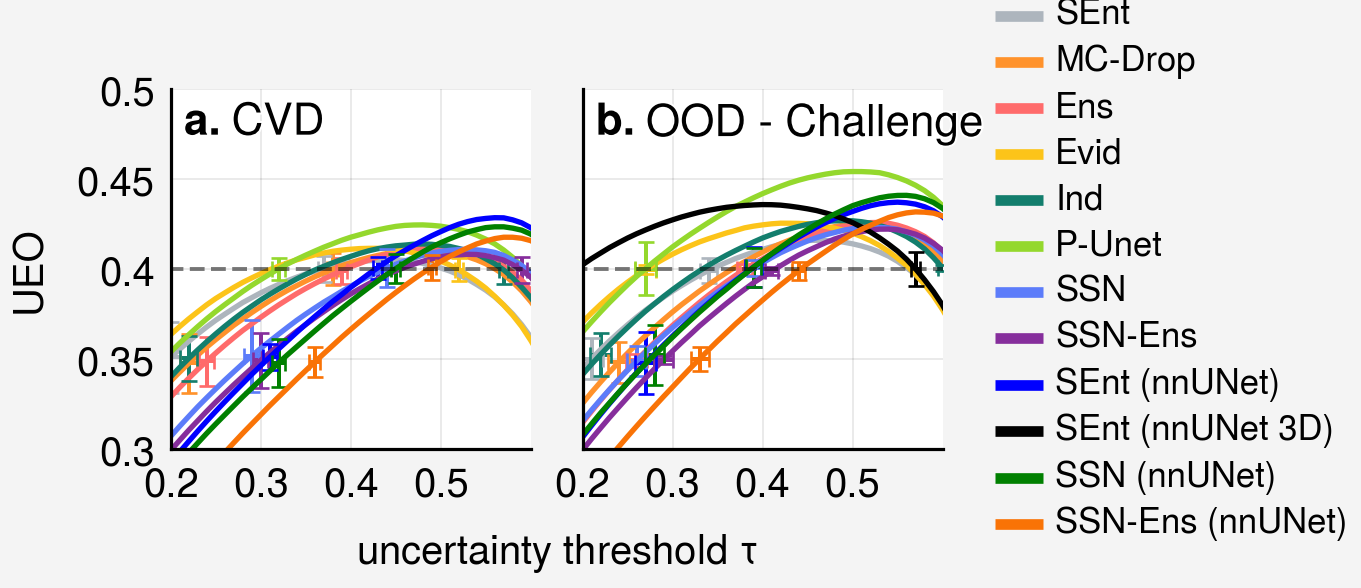

In [197]:
at_value = 0.4
dpi = 96
metric = "UEO"
# title = "Uncertainty Error Overlap (UEO) for each method"
fig, axs = pplt.subplots(ncols=2, refwidth="15em", dpi=dpi)
plot_2conf_metric_thresholds_95(axs[0], in_domain_df, metric, 
                        marker_point=[0.35, 0.4], ylim=(0.3, 0.5), xlim=(0.2, 0.6), ax_title="CVD")


plot_2conf_metric_thresholds_95(axs[1], out_domain_df, metric,
                                  marker_point=[0.35, 0.4], ylim=(0.3, 0.5), xlim=(0.2, 0.6), ax_title="OOD - Challenge")

legend = axs[1].legend(loc='right', ncols=1, frame=False, linewidth=4)
plt.setp(legend.get_texts(), fontsize=13)

for ax in axs:
    ax.plot([0, 1], [0.4, 0.4], linestyle='--', color='black', alpha=0.5)

axs.format(fontsize=15, titleloc='ul', abc='a.', abcloc='ul')
# fig.save("plots_output/UEO.pdf")
plt.show()

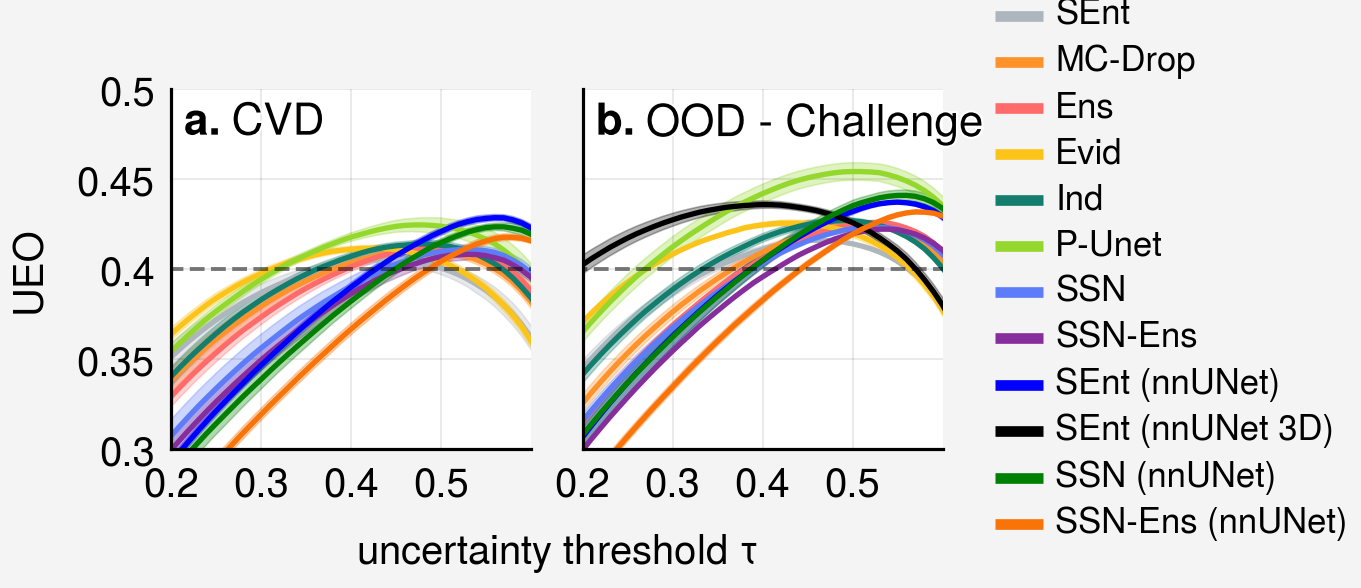

In [36]:
at_value = 0.4
dpi = 96
metric = "UEO"
# title = "Uncertainty Error Overlap (UEO) for each method"
fig, axs = pplt.subplots(ncols=2, refwidth="15em", dpi=dpi)
plot_metric_for_all_thresholds_95(axs[0], in_domain_df, metric, 
                        marker_point=None, ylim=(0.3, 0.5), xlim=(0.2, 0.6), ax_title="CVD")


plot_metric_for_all_thresholds_95(axs[1], out_domain_df, metric,
                                  marker_point=None, ylim=(0.3, 0.5), xlim=(0.2, 0.6), ax_title="OOD - Challenge")

legend = axs[1].legend(loc='right', ncols=1, frame=False, linewidth=4)
plt.setp(legend.get_texts(), fontsize=13)

for ax in axs:
    ax.plot([0, 1], [0.4, 0.4], linestyle='--', color='black', alpha=0.5)

axs.format(fontsize=15, titleloc='ul', abc='a.', abcloc='ul')
fig.save("plots_output/UEO.pdf")
plt.show()

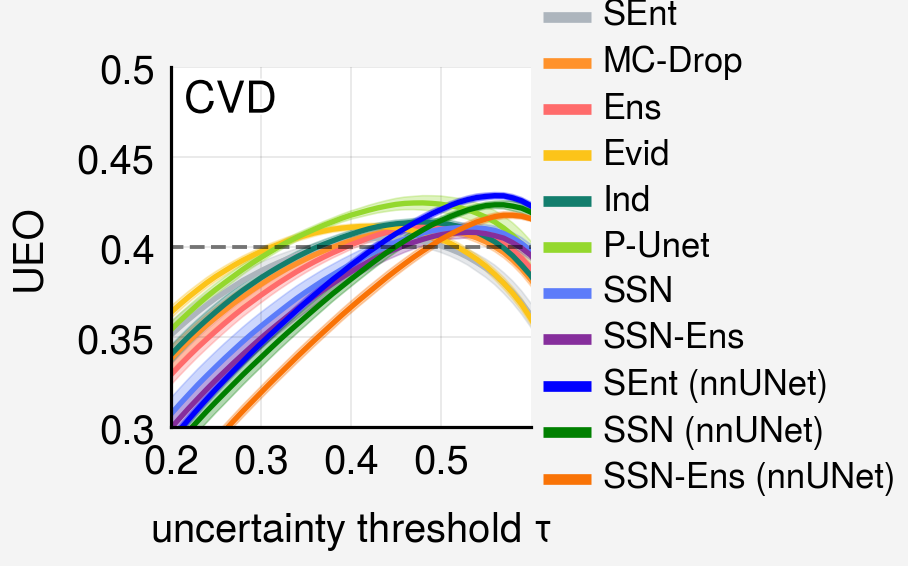

In [37]:
at_value = 0.4
dpi = 96
metric = "UEO"
# title = "Uncertainty Error Overlap (UEO) for each method"
fig, ax = pplt.subplots(ncols=1, nrows=1, refwidth="15em", dpi=dpi)
plot_metric_for_all_thresholds_95(ax, in_domain_df, metric, 
                        marker_point=None, ylim=(0.3, 0.5), xlim=(0.2, 0.6), ax_title="CVD")


legend = ax.legend(loc='right', ncols=1, frame=False, linewidth=4)
plt.setp(legend.get_texts(), fontsize=13)

ax.plot([0, 1], [0.4, 0.4], linestyle='--', color='black', alpha=0.5)

ax.format(fontsize=15, titleloc='ul', abc=False)
fig.save("plots_output/UEO_inhouse.pdf")
plt.show()

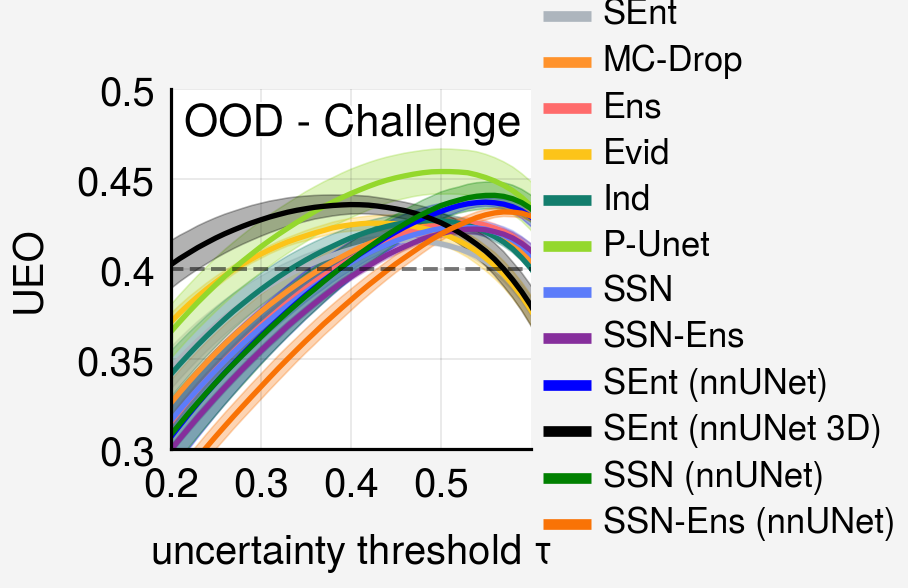

In [161]:
at_value = 0.4
dpi = 96
metric = "UEO"
# title = "Uncertainty Error Overlap (UEO) for each method"
fig, ax = pplt.subplots(ncols=1, nrows=1, refwidth="15em", dpi=dpi)
plot_metric_for_all_thresholds_95(ax, out_domain_df, metric, 
                        marker_point=None, ylim=(0.3, 0.5), xlim=(0.2, 0.6), ax_title="OOD - Challenge")


legend = ax.legend(loc='right', ncols=1, frame=False, linewidth=4)
plt.setp(legend.get_texts(), fontsize=13)

ax.plot([0, 1], [0.4, 0.4], linestyle='--', color='black', alpha=0.5)


ax.format(fontsize=15, titleloc='ul', abc=False)
fig.save("plots_output/UEO_OOD.pdf")
plt.show()

In [39]:
# at_value = 0.4
# dpi = 96
# metric = "UEOprecision"
# # title = "Uncertainty Error Overlap (UEO) for each method"
# fig, axs = pplt.subplots(ncols=2, refwidth="15em", dpi=dpi)
# plot_metric_for_all_thresholds_95(axs[0], in_domain_df, metric, 
#                         marker_point=None, ylim=(0., 0.6), xlim=(0., 0.7), ax_title="CVD")


# plot_metric_for_all_thresholds_95(axs[1], out_domain_df, metric,
#                                   marker_point=None, ylim=(0., 0.6), xlim=(0., 0.7), ax_title="OOD - Challenge")

# legend = axs[1].legend(loc='right', ncols=1, frame=False, linewidth=4)
# plt.setp(legend.get_texts(), fontsize=13)

# for ax in axs:
#     ax.plot([0, 1], [0.4, 0.4], linestyle='--', color='black', alpha=0.5)

# axs.format(fontsize=15, titleloc='ul', abc='a.', abcloc='ul')
# fig.save("plots_output/UEOprecision.pdf")
# plt.show()

In [40]:
# at_value = 0.4
# dpi = 96
# metric = "UEOrecall"
# # title = "Uncertainty Error Overlap (UEO) for each method"
# fig, axs = pplt.subplots(ncols=2, refwidth="15em", dpi=dpi)
# plot_metric_for_all_thresholds_95(axs[0], in_domain_df, metric, 
#                         marker_point=None, ylim=(0., 1), xlim=(0., 0.7), ax_title="CVD")


# plot_metric_for_all_thresholds_95(axs[1], out_domain_df, metric,
#                                   marker_point=None, ylim=(0., 1), xlim=(0., 0.7), ax_title="OOD - Challenge")

# legend = axs[1].legend(loc='right', ncols=1, frame=False, linewidth=4)
# plt.setp(legend.get_texts(), fontsize=13)

# for ax in axs:
#     ax.plot([0, 1], [0.4, 0.4], linestyle='--', color='black', alpha=0.5)

# axs.format(fontsize=15, titleloc='ul', abc='a.', abcloc='ul')
# fig.save("plots_output/UEOprecision.pdf")
# plt.show()

In [41]:
# metric = "UEOrecall"
# fig, axs = pplt.subplots(ncols=1, refwidth="15em", dpi=dpi)

# plot_metric_for_all_thresholds_95(axs[0], out_domain_df, metric,
#                                   marker_point=None, ylim=(0., 1), xlim=(0., 0.7), ax_title="OOD - Challenge")

In [42]:
# fig, axs = pplt.subplots(ncols=3, refwidth="15em", dpi=dpi, share=False, spanx=True)

# metric = "p_acc_cert"
# tmetric_df = plot_metric_for_all_thresholds_95(
#     axs[0], in_domain_df, metric, (0.875, 0.975), 
#     title="Patchwise Uncertainty Metrics (CVD)", ax_title = r"$p(acc|cert)$", ylabel='',
#     marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.2,0.5)
# )

# metric = "p_uncert_inacc"
# tmetric_df = plot_metric_for_all_thresholds_95(
#     axs[1], in_domain_df, metric, (0., 0.7), ax_title= r"$p(uncert|inacc)$", ylabel="",
#     marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.2,0.5)
# )

# metric = "pavpu"
# tmetric_df = plot_metric_for_all_thresholds_95(
#     axs[2], in_domain_df, metric, (0.8, 0.95), ax_title = "$pavpu$", ylabel="",
#     marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.2,0.5),
# )

# axs.format(fontsize=13, abc='a.', abcloc='ul', titleloc='ul')
# legend = axs[1].legend(loc='bottom', ncols=8, frame=False, linewidth=4)
# plt.setp(legend.get_texts(), fontsize=11)
# fig.save("plots_output/patch_uncert_metrics_inhouse.pdf")

In [ ]:
# fig, axs = pplt.subplots(ncols=3, refwidth="15em", dpi=dpi, share=False, spanx=True)

# metric = "p_acc_cert"
# tmetric_df = plot_metric_for_all_thresholds_95(
#     axs[0], out_domain_df, metric, (0.875, 0.975), 
#     title="Patchwise Uncertainty Metrics (CVD)", ax_title = r"$p(acc|cert)$", ylabel='',
#     marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.2,0.5)
# )

# metric = "p_uncert_inacc"
# tmetric_df = plot_metric_for_all_thresholds_95(
#     axs[1], out_domain_df, metric, (0., 0.7), ax_title= r"$p(uncert|inacc)$", ylabel="",
#     marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.2,0.5)
# )

# metric = "pavpu"
# tmetric_df = plot_metric_for_all_thresholds_95(
#     axs[2], out_domain_df, metric, (0.8, 0.95), ax_title = "$pavpu$", ylabel="",
#     marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.2,0.5),
# )

# axs.format(fontsize=13, abc='a.', abcloc='ll', titleloc='ul')
# legend = axs[1].legend(loc='bottom', ncols=8, frame=False, linewidth=4)
# plt.setp(legend.get_texts(), fontsize=11)
# fig.save("plots_output/patch_uncert_metrics_OOD.pdf")

### plot the ROI curve

In [31]:
def plot_pres_rec_curve_for_all_thresholds_95(ax, df, metric, ylim=None, xlim=None, title="", ax_title="", marker_point=None, ylabel=None):
    thresholds = np.arange(0, 0.7, 0.01)
    dfs = []
    # get a mean and conf interval for these curves.
    for tau in thresholds:
        dfs.append(mean_and_95_conf_over_cvfold(df, f"{metric}_{tau:.2f}"))
    tmetric_df = pd.concat(dfs, axis=1)
    
    mean_cols = [f"{metric}_{tau:.2f} mean" for tau in thresholds]
    conf_cols = [f"{metric}_{tau:.2f} 95%" for tau in thresholds]
    
    for key in UNCERTAINTY_TYPES:
        mean = tmetric_df[mean_cols].loc[key].values
        conf = tmetric_df[conf_cols].loc[key].values
        ax.plot(thresholds, mean, label=key, color=UNCERTAINTY_COLOURS[key], linewidth=2)
        ax.fill_between(thresholds.tolist(), (mean - conf).tolist(), (mean + conf).tolist(), alpha=0.3, color=UNCERTAINTY_COLOURS[key])
        
        if marker_point is not None:
            ax.scatter(marker_point.loc[key]['threshold'], mean[int(marker_point.loc[key][0])], s=100, 
                       color=UNCERTAINTY_COLOURS[key], zorder=3, edgecolors='black')
    
    # format spines
    ax.spines[['top','right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_linewidth(1.2)

    # Reformat x-axis label and tick labels
    ax.set_xlabel(r"uncertainty threshold $\tau$", labelpad=10) # No need for an axis label
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelrotation=0)
    ax.xaxis.set_ticks(np.arange(xlim[0], xlim[1], 0.1))
    # ax.yaxis.set_ticks(np.arange(ylim[0], ylim[1], 0.05))

    # Reformat y-axis
    if ylabel != False:
        if ylabel == None:
            ylabel = metric
        ax.set_ylabel(ylabel, labelpad=10)
        ax.yaxis.set_label_position("left")
    ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)

    ax.set_title(ax_title)
    ax.minorticks_off()
    
    # remove the little x tick line
    ax.tick_params(axis='x', which='both', bottom=False, top=False)
    return 

/home/s2208943/miniconda3/envs/wmh/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/s2208943/miniconda3/envs/wmh/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


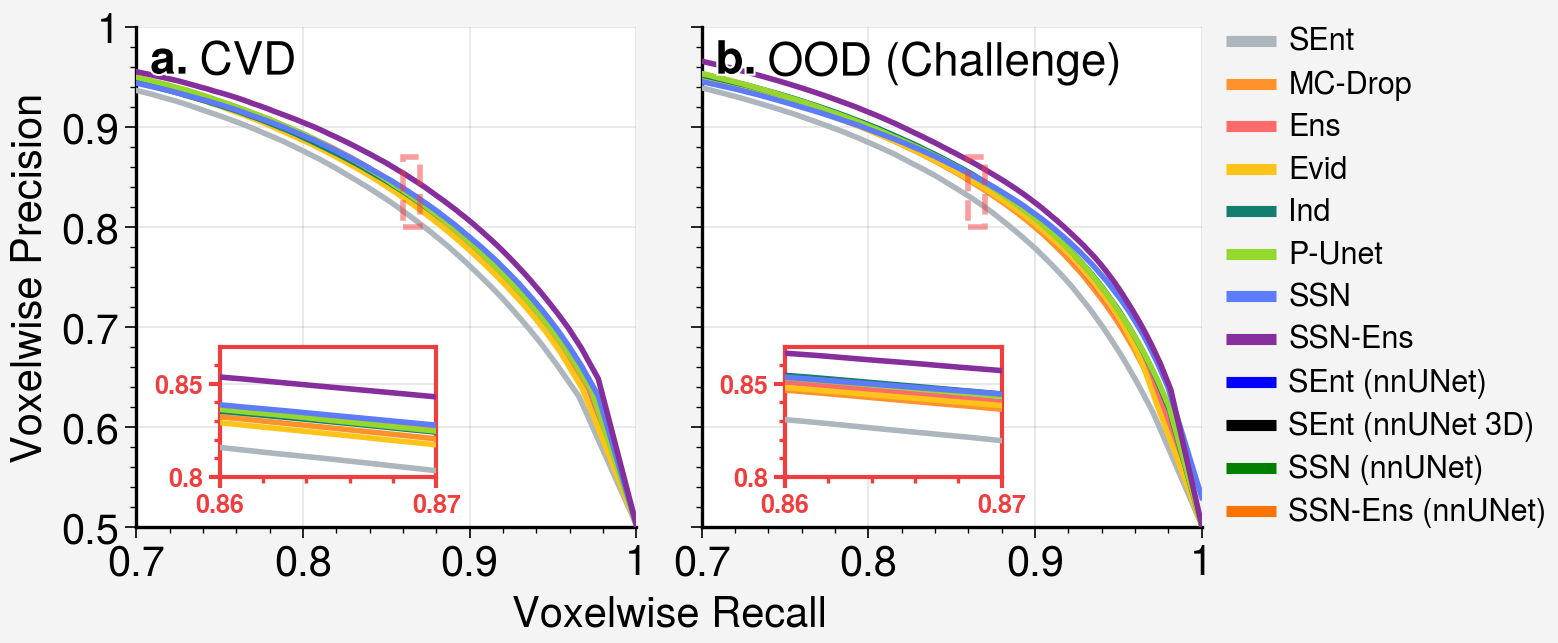

In [32]:
fig, axs = pplt.subplots(refwidth="20em", nrows=1, ncols=2, span=True, share=True)
for idx, df in enumerate([in_domain_df, out_domain_df]):
    ax = axs[idx]
    
    ix = ax.inset(
        [0.75, 0.55, 0.13, 0.13], transform='data', zoom=True,
        zoom_kw={'edgecolor': 'red7', 'lw': 2, 'ls': '--'}
    )
    ix.format(
        xlim=(0.86, 0.87), ylim=(0.8, 0.87), metacolor='red7',
        linewidth=1.5, ticklabelweight='bold'
    )
    
    for utype in UNCERTAINTY_TYPES:
        fold_xs = []
        fold_ys = []
        for fold in range(6):
            sel = df[(df['uncertainty_type'] == utype) & (df['cv_fold'] == str(fold))]
            txs = []
            tys = []
            for t in np.arange(0., 0.99, 0.01):
                colx = f'voxelwise_trecall_{t:.2f}'
                valuesx = sel[colx].values
                coly = f'voxelwise_tprecision_{t:.2f}'
                valuesy = sel[coly].values

                valuesx[np.isnan(valuesx)] = 1
                valuesy[np.isnan(valuesy)] = 1
                # mean_over_data_x = np.mean(valuesx[~np.isnan(valuesx)])
                # mean_over_data_y = np.mean(valuesy[~np.isnan(valuesy)])
                mean_over_data_x = np.mean(valuesx)
                mean_over_data_y = np.mean(valuesy)
                txs.append(mean_over_data_x)
                tys.append(mean_over_data_y)

            txs = np.array(txs)
            tys = np.array(tys)
            order = np.argsort(txs)
            fold_xs.append(txs[order])
            fold_ys.append(tys[order])

        fold_xs = np.stack(fold_xs)
        fold_ys = np.stack(fold_ys)

        ax.plot(np.mean(fold_xs, axis=0), np.mean(fold_ys, axis=0), color=UNCERTAINTY_COLOURS[utype], zorder=3, linewidth=2)
        ix.plot(np.mean(fold_xs, axis=0), np.mean(fold_ys, axis=0), color=UNCERTAINTY_COLOURS[utype], zorder=3, linewidth=2, label=utype)
    
    ax.set_xlim(0.7, 1)
    ax.set_ylim(0.5, 1)
    
    ax.spines[['top','right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_linewidth(1.2)

axs[0].set_title("CVD")
axs[1].set_title("OOD (Challenge)")
legend = axs[1].legend(loc='right', ncols=1, frame=False, linewidth=4)
plt.setp(legend.get_texts(), fontsize=11)
axs.format(xlabel='Voxelwise Recall', ylabel='Voxelwise Precision', fontsize=15, abcloc='ul', abc='a.', titleloc='ul')
               
fig.save("plots_output/voxelwise_precision_recall.pdf")           


In [33]:
s_utypes

['SEnt', 'MC-Drop', 'Ens', 'Evid', 'Ind', 'P-Unet', 'SSN', 'SSN-Ens']

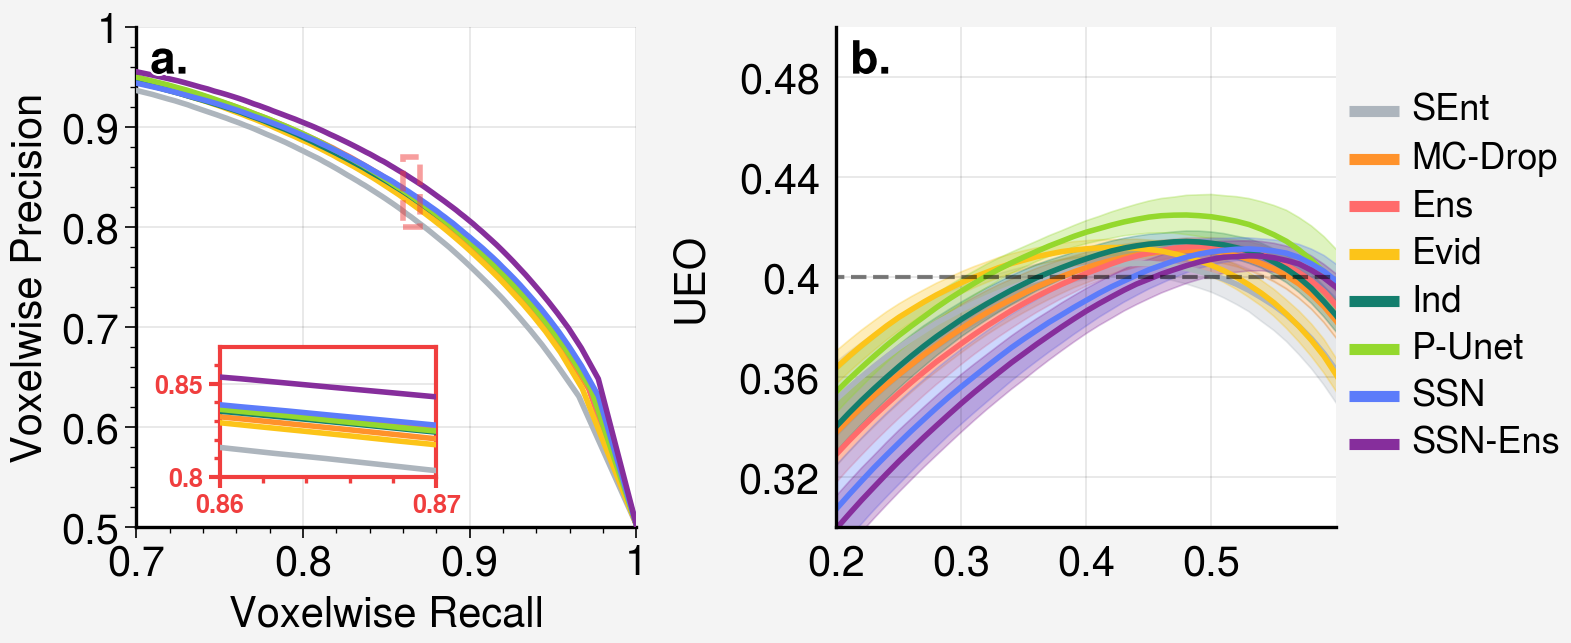

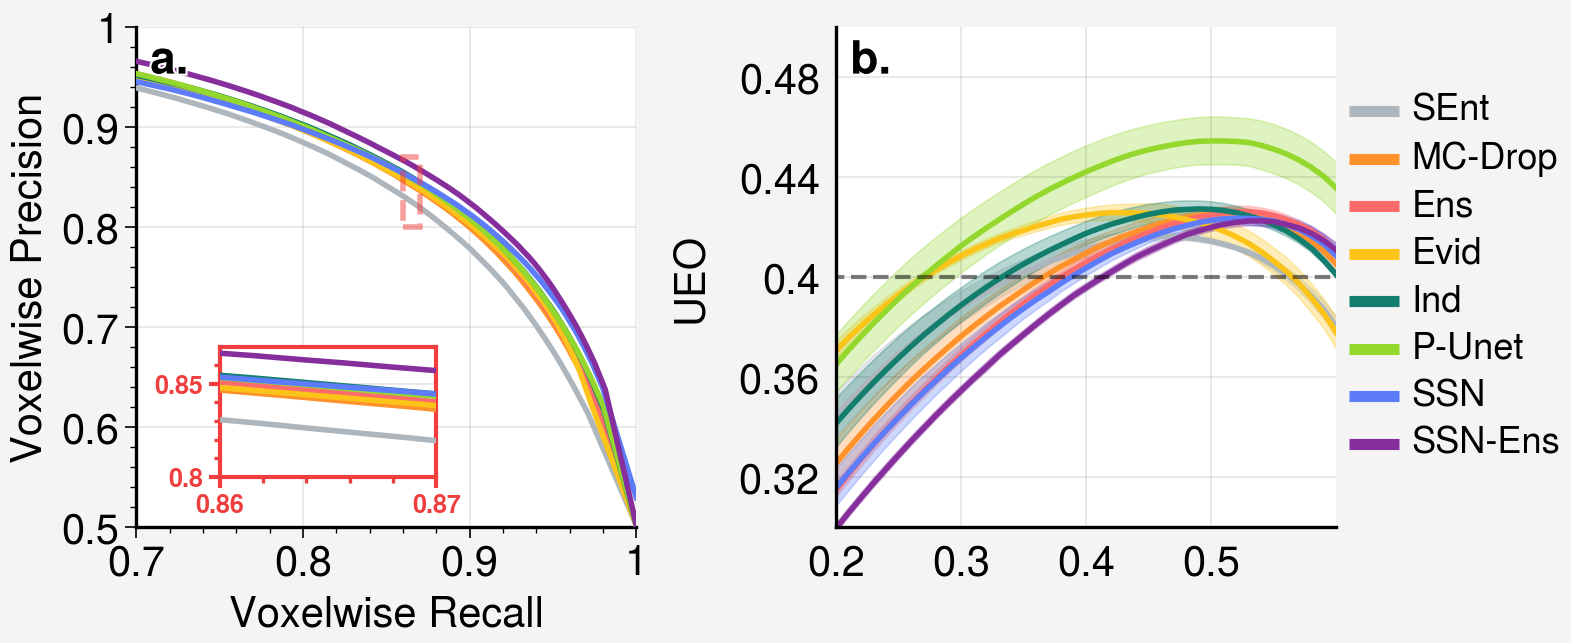

In [89]:
at_value = 0.4

for idx, df in enumerate([in_domain_df, out_domain_df]):
    fig, axs = pplt.subplots(refwidth="20em", nrows=1, ncols=2, share=False, span=False)
    ax = axs[0]
    
    ix = ax.inset(
        [0.75, 0.55, 0.13, 0.13], transform='data', zoom=True,
        zoom_kw={'edgecolor': 'red7', 'lw': 2, 'ls': '--'}
    )
    ix.format(
        xlim=(0.86, 0.87), ylim=(0.8, 0.87), metacolor='red7',
        linewidth=1.5, ticklabelweight='bold'
    )
    
    for utype in s_utypes:
        fold_xs = []
        fold_ys = []
        for fold in range(6):
            sel = df[(df['uncertainty_type'] == utype) & (df['cv_fold'] == str(fold))]
            txs = []
            tys = []
            for t in np.arange(0., 0.99, 0.01):
                colx = f'voxelwise_trecall_{t:.2f}'
                valuesx = sel[colx].values
                coly = f'voxelwise_tprecision_{t:.2f}'
                valuesy = sel[coly].values

                valuesx[np.isnan(valuesx)] = 1
                valuesy[np.isnan(valuesy)] = 1
                # mean_over_data_x = np.mean(valuesx[~np.isnan(valuesx)])
                # mean_over_data_y = np.mean(valuesy[~np.isnan(valuesy)])
                mean_over_data_x = np.mean(valuesx)
                mean_over_data_y = np.mean(valuesy)
                txs.append(mean_over_data_x)
                tys.append(mean_over_data_y)

            txs = np.array(txs)
            tys = np.array(tys)
            order = np.argsort(txs)
            fold_xs.append(txs[order])
            fold_ys.append(tys[order])

        fold_xs = np.stack(fold_xs)
        fold_ys = np.stack(fold_ys)

        ax.plot(np.mean(fold_xs, axis=0), np.mean(fold_ys, axis=0), color=UNCERTAINTY_COLOURS[utype], zorder=3, linewidth=2)
        ix.plot(np.mean(fold_xs, axis=0), np.mean(fold_ys, axis=0), color=UNCERTAINTY_COLOURS[utype], zorder=3, linewidth=2, label=utype)
    
    ax.set_xlim(0.7, 1)
    ax.set_ylim(0.5, 1)
    
    ax.spines[['top','right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_linewidth(1.2)

    # ax.set_title("CVD" if idx == 0 else "OOD (Challenge)")
    # axs[1].set_title()
    # legend = ax.legend(loc='right', ncols=1, frame=False, linewidth=4)
    # plt.setp(legend.get_texts(), fontsize=11)
    ax.format(xlabel='Voxelwise Recall', ylabel='Voxelwise Precision')
    
    metric = 'UEO'
    ax = axs[1]
    plot_metric_for_all_thresholds_95(ax, df, metric, 
                        marker_point=None, ylim=(0.3, 0.5), xlim=(0.2, 0.6), ax_title="", uncertainty_types=s_utypes)


    legend = ax.legend(loc='right', ncols=1, frame=False, linewidth=4)
    plt.setp(legend.get_texts(), fontsize=13)
    
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))

    ax.plot([0, 1], [0.4, 0.4], linestyle='--', color='black', alpha=0.5)
    axs.format(fontsize=15, abc='a.', abcloc='ul', titleloc='ul')

    fig.save(f'plots_output/voxelwise_precision_recall_{"CVD" if idx == 0 else "OOD_chal"}.pdf')
    plt.show()

In [45]:
# fig, axs = pplt.subplots(refwidth="20em", nrows=1, ncols=2, span=True, share=True)
# for idx, df in enumerate([in_domain_df, out_domain_df]):
#     ax = axs[idx]
    
#     ix = ax.inset(
#         [0.85, 0.75, 0.13, 0.13], transform='data', zoom=True,
#         zoom_kw={'edgecolor': 'red7', 'lw': 2, 'ls': '--'}
#     )
#     ix.format(
#         xlim=(0.83, 0.9), ylim=(0.62, 0.65), metacolor='red7',
#         linewidth=1.5, ticklabelweight='bold'
#     )
    
#     for utype in UNCERTAINTY_TYPES:
#         fold_xs = []
#         fold_ys = []
#         for fold in range(6):
#             sel = df[(df['uncertainty_type'] == utype) & (df['cv_fold'] == str(fold))]
#             txs = []
#             tys = []
#             for t in np.arange(0., 0.7, 0.01):
#                 colx = f'UEOrecall_{t:.2f}'
#                 valuesx = sel[colx].values
#                 coly = f'UEOprecision_{t:.2f}'
#                 valuesy = sel[coly].values

#                 valuesx[np.isnan(valuesx)] = 1
#                 valuesy[np.isnan(valuesy)] = 1
#                 # mean_over_data_x = np.mean(valuesx[~np.isnan(valuesx)])
#                 # mean_over_data_y = np.mean(valuesy[~np.isnan(valuesy)])
#                 mean_over_data_x = np.mean(valuesx)
#                 mean_over_data_y = np.mean(valuesy)
#                 txs.append(mean_over_data_x)
#                 tys.append(mean_over_data_y)

#             txs = np.array(txs)
#             tys = np.array(tys)
#             order = np.argsort(txs)
#             fold_xs.append(txs[order])
#             fold_ys.append(tys[order])

#         fold_xs = np.stack(fold_xs)
#         fold_ys = np.stack(fold_ys)

#         ax.plot(np.mean(fold_xs, axis=0), np.mean(fold_ys, axis=0), color=UNCERTAINTY_COLOURS[utype], zorder=3, linewidth=2)
#         ix.plot(np.mean(fold_xs, axis=0), np.mean(fold_ys, axis=0), color=UNCERTAINTY_COLOURS[utype], zorder=3, linewidth=2, label=utype)
    
#     ax.set_xlim(0.6, 1)
#     ax.set_ylim(0.5, 1)
    
#     ax.spines[['top','right']].set_visible(False)
#     ax.spines[['left', 'bottom']].set_linewidth(1.2)

# axs[0].set_title("CVD")
# axs[1].set_title("OOD (Challenge)")
# legend = axs[1].legend(loc='right', ncols=1, frame=False, linewidth=4)
# plt.setp(legend.get_texts(), fontsize=11)
# axs.format(xlabel='UE Recall', ylabel='UE Precision', fontsize=15, abcloc='ul', abc='a.', titleloc='ul')

# fig.save("plots_output/UE_precision_recall.pdf")   


In [46]:
# for idx, df in enumerate([in_domain_df, out_domain_df]):
#     fig, ax = pplt.subplots(refwidth="20em", nrows=1, ncols=1)
    
#     ix = ax.inset(
#         [0.85, 0.75, 0.13, 0.13], transform='data', zoom=True,
#         zoom_kw={'edgecolor': 'red7', 'lw': 2, 'ls': '--'}
#     )
#     ix.format(
#         xlim=(0.83, 0.9), ylim=(0.62, 0.65), metacolor='red7',
#         linewidth=1.5, ticklabelweight='bold'
#     )
    
#     for utype in UNCERTAINTY_TYPES:
#         fold_xs = []
#         fold_ys = []
#         for fold in range(6):
#             sel = df[(df['uncertainty_type'] == utype) & (df['cv_fold'] == str(fold))]
#             txs = []
#             tys = []
#             for t in np.arange(0., 0.7, 0.01):
#                 colx = f'UEOrecall_{t:.2f}'
#                 valuesx = sel[colx].values
#                 coly = f'UEOprecision_{t:.2f}'
#                 valuesy = sel[coly].values

#                 valuesx[np.isnan(valuesx)] = 1
#                 valuesy[np.isnan(valuesy)] = 1
#                 # mean_over_data_x = np.mean(valuesx[~np.isnan(valuesx)])
#                 # mean_over_data_y = np.mean(valuesy[~np.isnan(valuesy)])
#                 mean_over_data_x = np.mean(valuesx)
#                 mean_over_data_y = np.mean(valuesy)
#                 txs.append(mean_over_data_x)
#                 tys.append(mean_over_data_y)

#             txs = np.array(txs)
#             tys = np.array(tys)
#             order = np.argsort(txs)
#             fold_xs.append(txs[order])
#             fold_ys.append(tys[order])

#         fold_xs = np.stack(fold_xs)
#         fold_ys = np.stack(fold_ys)

#         ax.plot(np.mean(fold_xs, axis=0), np.mean(fold_ys, axis=0), color=UNCERTAINTY_COLOURS[utype], zorder=3, linewidth=2)
#         ix.plot(np.mean(fold_xs, axis=0), np.mean(fold_ys, axis=0), color=UNCERTAINTY_COLOURS[utype], zorder=3, linewidth=2, label=utype)
    
#     ax.set_xlim(0.6, 1)
#     ax.set_ylim(0.5, 1)
    
#     ax.spines[['top','right']].set_visible(False)
#     ax.spines[['left', 'bottom']].set_linewidth(1.2)

#     ax.set_title("CVD" if idx == 0 else "OOD (Challenge)")
#     legend = ax.legend(loc='right', ncols=1, frame=False, linewidth=4)
#     plt.setp(legend.get_texts(), fontsize=11)
#     ax.format(xlabel='UE Recall', ylabel='UE Precision', fontsize=15, abcloc='ul', abc='a.', titleloc='ul')

#     fig.save(f'plots_output/UE_precision_recall_{"CVD" if idx == 0 else "OOD (Challenge)"}.pdf')   
#     plt.show()

### notes on bits of analysis to talk about:

- useability of uncertainty maps vs robustness.
- evid produces a really useful uncertainty map
- so does punet
- SEnt is poor across all metrics, and is less robust.
- the pavpu metrics do not account for the effective calibration of each technique, and cannot be used on face value, while high scores are attainable, these may be at scores with poor overlap (i.e lots of false positives).
- we need to question now, does p-unet do well / does evidential do well?


In [47]:
# fig, axs = pplt.subplots(ncols=3, refwidth="15em", dpi=dpi, share=False, spanx=True)

# metric = "mean_cov_mean_missed_lesions3d_all"
# tmetric_df = plot_metric_for_all_thresholds_95(
#     axs[0], in_domain_df, metric,
#     ax_title="Coverage of \nunsegmented lesions", ylabel="Coverage Proportion",
#     marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.2,0.5), ylim=(0.2, 0.7)
# )

# metric = "prop_lesions_missed3d_all"
# axs[1].plot([0, 1], [0.66, 0.66], '--', c='black', linewidth=3, alpha=0.5)
# tmetric_df = plot_metric_for_all_thresholds_95(
#     axs[1], in_domain_df, metric, ax_title="Proportion of \nundetected lesions", ylabel="Proportion",
#     marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.1,0.5), ylim=(0.3, 0.7)
# )

# metric = "mean_size_missed_lesions3d_all"
# tmetric_df = plot_metric_for_all_thresholds_95(
#     axs[2], in_domain_df, metric, ax_title="Size of \nundetected lesions", ylabel="Size ",
#     marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.2,0.5), ylim=(4, 8)
# )

# axs.format(fontsize=13, abc='a.', abcloc='ul')
# legend = axs[1].legend(loc='bottom', ncols=8, frame=False, linewidth=4)
# plt.setp(legend.get_texts(), fontsize=11)
# fig.save("plots_output/lesion_instance_coverage_inhouse.pdf")

In [48]:
# fig, axs = pplt.subplots(ncols=3, refwidth="15em", dpi=dpi, share=False, spanx=True)

# metric = "mean_cov_mean_missed_lesions3d_all"
# tmetric_df = plot_metric_for_all_thresholds_95(
#     axs[0], out_domain_df, metric,
#     ax_title="Coverage of \nunsegmented lesions", ylabel="Coverage Proportion",
#     marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.2,0.5), ylim=(0.2, 0.7)
# )

# metric = "prop_lesions_missed3d_all"
# axs[1].plot([0, 1], [0.68, 0.68], '--', c='black', linewidth=3, alpha=0.5)
# tmetric_df = plot_metric_for_all_thresholds_95(
#     axs[1], out_domain_df, metric, ax_title="Proportion of \nundetected lesions", ylabel="Proportion",
#     marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.1,0.5), ylim=(0.3, 0.7)
# )

# metric = "mean_size_missed_lesions3d_all"
# tmetric_df = plot_metric_for_all_thresholds_95(
#     axs[2], out_domain_df, metric, ax_title="Size of \nundetected lesions", ylabel="Size ",
#     marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.2,0.5), ylim=(4, 8)
# )

# axs.format(fontsize=13, abc='a.', abcloc='ul')
# legend = axs[1].legend(loc='bottom', ncols=8, frame=False, linewidth=4)
# plt.setp(legend.get_texts(), fontsize=11)
# fig.save("plots_output/lesion_instance_coverage_OOD.pdf")

### combined pavpu and lesion statistics

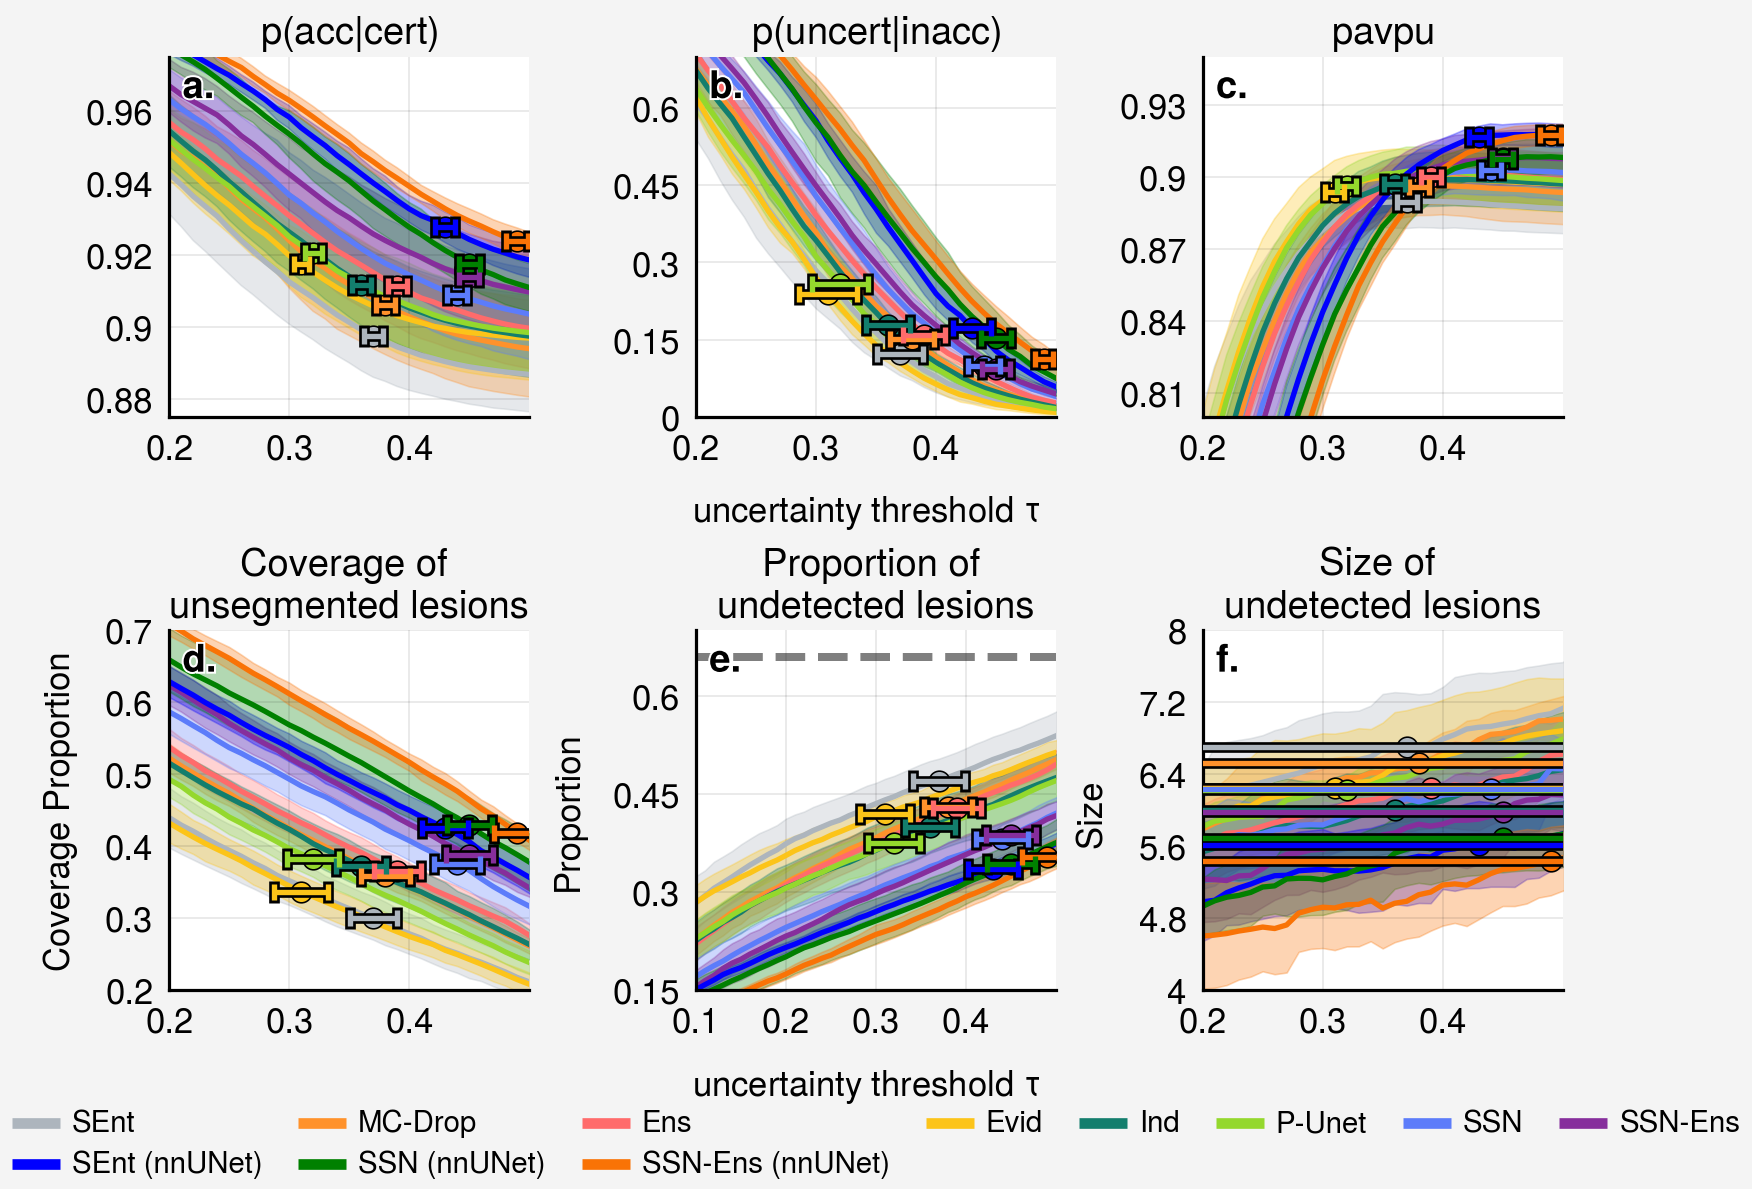

In [213]:
fig, axs = pplt.subplots(ncols=3, nrows=2, refwidth="15em", dpi=dpi, share=False, spanx=True)

metric = "p_acc_cert"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[0], in_domain_df, metric, (0.875, 0.975), 
    title="Patchwise Uncertainty Metrics (CVD)", ax_title = r"$p(acc|cert)$", ylabel='',
    marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.2,0.5)
)

metric = "p_uncert_inacc"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[1], in_domain_df, metric, (0., 0.7), ax_title= r"$p(uncert|inacc)$", ylabel="",
    marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.2,0.5)
)

metric = "pavpu"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[2], in_domain_df, metric, (0.8, 0.95), ax_title = "$pavpu$", ylabel="",
    marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.2,0.5),
)

metric = "mean_cov_mean_missed_lesions3d_all"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[3], in_domain_df, metric,
    ax_title="Coverage of \nunsegmented lesions", ylabel="Coverage Proportion",
    marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.2,0.5), ylim=(0.2, 0.7)
)

metric = "prop_lesions_missed3d_all"
axs[4].plot([0, 1], [0.66, 0.66], '--', c='black', linewidth=3, alpha=0.5)
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[4], in_domain_df, metric, ax_title="Proportion of \nundetected lesions", ylabel="Proportion",
    marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.1,0.5), ylim=(0.15, 0.7)
)

metric = "mean_size_missed_lesions3d_all"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[5], in_domain_df, metric, ax_title="Size of \nundetected lesions", ylabel="Size ",
    marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.2,0.5), ylim=(4, 8), xconf=False
)

for ax in axs:
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))

axs.format(fontsize=13, abc='a.', abcloc='ul')
legend = axs[4].legend(loc='bottom', ncols=8, frame=False, linewidth=4)
plt.setp(legend.get_texts(), fontsize=11)
fig.save("plots_output/pavpu_and_lesion_coverage_inhouse.pdf")

In [215]:
at_value=0.38

fig, axs = pplt.subplots(ncols=3, nrows=2, refwidth="15em", dpi=dpi, share=False, spanx=True)

metric = "p_acc_cert"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[0], out_domain_df, metric, (0.875, 0.975), 
    title="Patchwise Uncertainty Metrics (CVD)", ax_title = r"$p(acc|cert)$", ylabel='',
    marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.2,0.5)
)

metric = "p_uncert_inacc"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[1], out_domain_df, metric, (0., 0.7), ax_title= r"$p(uncert|inacc)$", ylabel="",
    marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.2,0.5)
)

metric = "pavpu"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[2], out_domain_df, metric, (0.8, 0.95), ax_title = "$pavpu$", ylabel="",
    marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.2,0.5),
)

metric = "mean_cov_mean_missed_lesions3d_all"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[3], out_domain_df, metric,
    ax_title="Coverage of \nunsegmented lesions", ylabel="Coverage Proportion",
    marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.2,0.5), ylim=(0.2, 0.7)
)

metric = "prop_lesions_missed3d_all"
axs[4].plot([0, 1], [0.68, 0.68], '--', c='black', linewidth=3, alpha=0.5)
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[4], out_domain_df, metric, ax_title="Proportion of \nundetected lesions", ylabel="Proportion",
    marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.1,0.5), ylim=(0.15, 0.7)
)

metric = "mean_size_missed_lesions3d_all"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[5], out_domain_df, metric, ax_title="Size of \nundetected lesions", ylabel="Size ",
    marker_point=UEO_at_point(in_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.2,0.5), ylim=(4, 6), xconf=False
)

for ax in axs:
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))

axs.format(fontsize=13, abc='a.', abcloc='ul')
legend = axs[4].legend(loc='bottom', ncols=8, frame=False, linewidth=4)
plt.setp(legend.get_texts(), fontsize=11)
fig.save("plots_output/pavpu_and_lesion_coverage_OOD.pdf")


KeyboardInterrupt

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f26d0dd9c60>>
Traceback (most recent call last):
  File "/home/s2208943/miniconda3/envs/wmh/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 790, in _clean_thread_parent_frames
    active_threads = {thread.ident for thread in threading.enumerate()}
  File "/home/s2208943/miniconda3/envs/wmh/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 790, in <setcomp>
    active_threads = {thread.ident for thread in threading.enumerate()}
  File "/home/s2208943/miniconda3/envs/wmh/lib/python3.10/threading.py", line 1145, in ident
    @property
KeyboardInterrupt: 


Error in callback <function flush_figures at 0x7f25dcaa8280> (for post_execute), with arguments args (),kwargs {}:


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f26d0dd9c60>>
Traceback (most recent call last):
  File "/home/s2208943/miniconda3/envs/wmh/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 

KeyboardInterrupt



In [222]:
UNCERTAINTY_TYPES

['SEnt',
 'MC-Drop',
 'Ens',
 'Evid',
 'Ind',
 'P-Unet',
 'SSN',
 'SSN-Ens',
 'SEnt (nnUNet)',
 'SEnt (nnUNet 3D)',
 'SSN (nnUNet)',
 'SSN-Ens (nnUNet)']

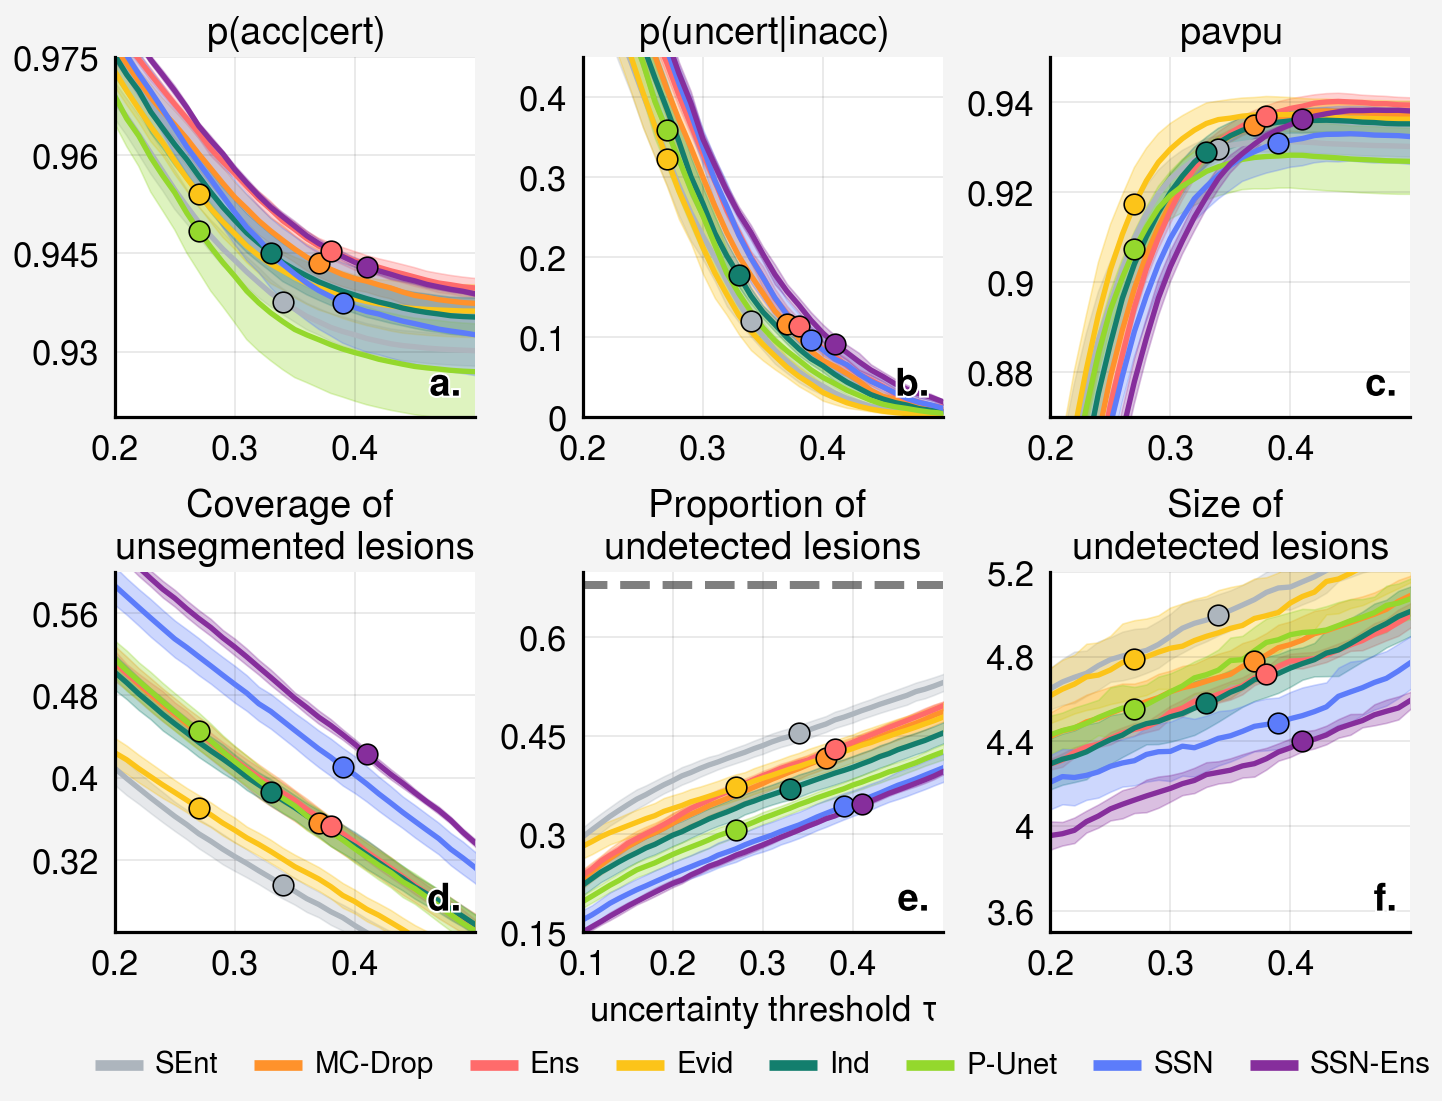

In [295]:
fig, axs = pplt.subplots(ncols=3, nrows=2, refwidth="15em", dpi=dpi, share=False, spanx=True)

at_value=0.4

metric = "p_acc_cert"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[0], out_domain_df, metric, (0.92, 0.975), 
    title="Patchwise Uncertainty Metrics (CVD)", ax_title = r"$p(acc|cert)$", ylabel='',
    marker_point=UEO_at_point(out_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.2,0.5), uncertainty_types=s_utypes
)

metric = "p_uncert_inacc"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[1], out_domain_df, metric, (0., 0.45), ax_title= r"$p(uncert|inacc)$", ylabel="",
    marker_point=UEO_at_point(out_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.2,0.5), uncertainty_types=s_utypes
)

metric = "pavpu"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[2], out_domain_df, metric, (0.87, 0.95), ax_title = "$pavpu$", ylabel="",
    marker_point=UEO_at_point(out_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.2,0.5), uncertainty_types=s_utypes
)

metric = "mean_cov_mean_missed_lesions3d_all"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[3], out_domain_df, metric,
    ax_title="Coverage of \nunsegmented lesions", ylabel=False,
    marker_point=UEO_at_point(out_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.2,0.5), ylim=(0.25, 0.6), uncertainty_types=s_utypes
)

metric = "prop_lesions_missed3d_all"
axs[4].plot([0, 1], [0.68, 0.68], '--', c='black', linewidth=3, alpha=0.5)
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[4], out_domain_df, metric, ax_title="Proportion of \nundetected lesions", ylabel=False,
    marker_point=UEO_at_point(out_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.1,0.5), ylim=(0.15, 0.7), uncertainty_types=s_utypes, xlabel=True
)

metric = "mean_size_missed_lesions3d_all"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[5], out_domain_df, metric, ax_title="Size of \nundetected lesions", ylabel=False,
    marker_point=UEO_at_point(out_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.2,0.5), ylim=(3.5, 5.2), uncertainty_types=s_utypes
)

for ax in axs:
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))

axs.format(fontsize=13, abc='a.', abcloc='lr')
legend = axs[4].legend(loc='bottom', ncols=8, frame=False, linewidth=4)
plt.setp(legend.get_texts(), fontsize=11)
fig.save("plots_output/pavpu_and_lesion_coverage_OOD.pdf")

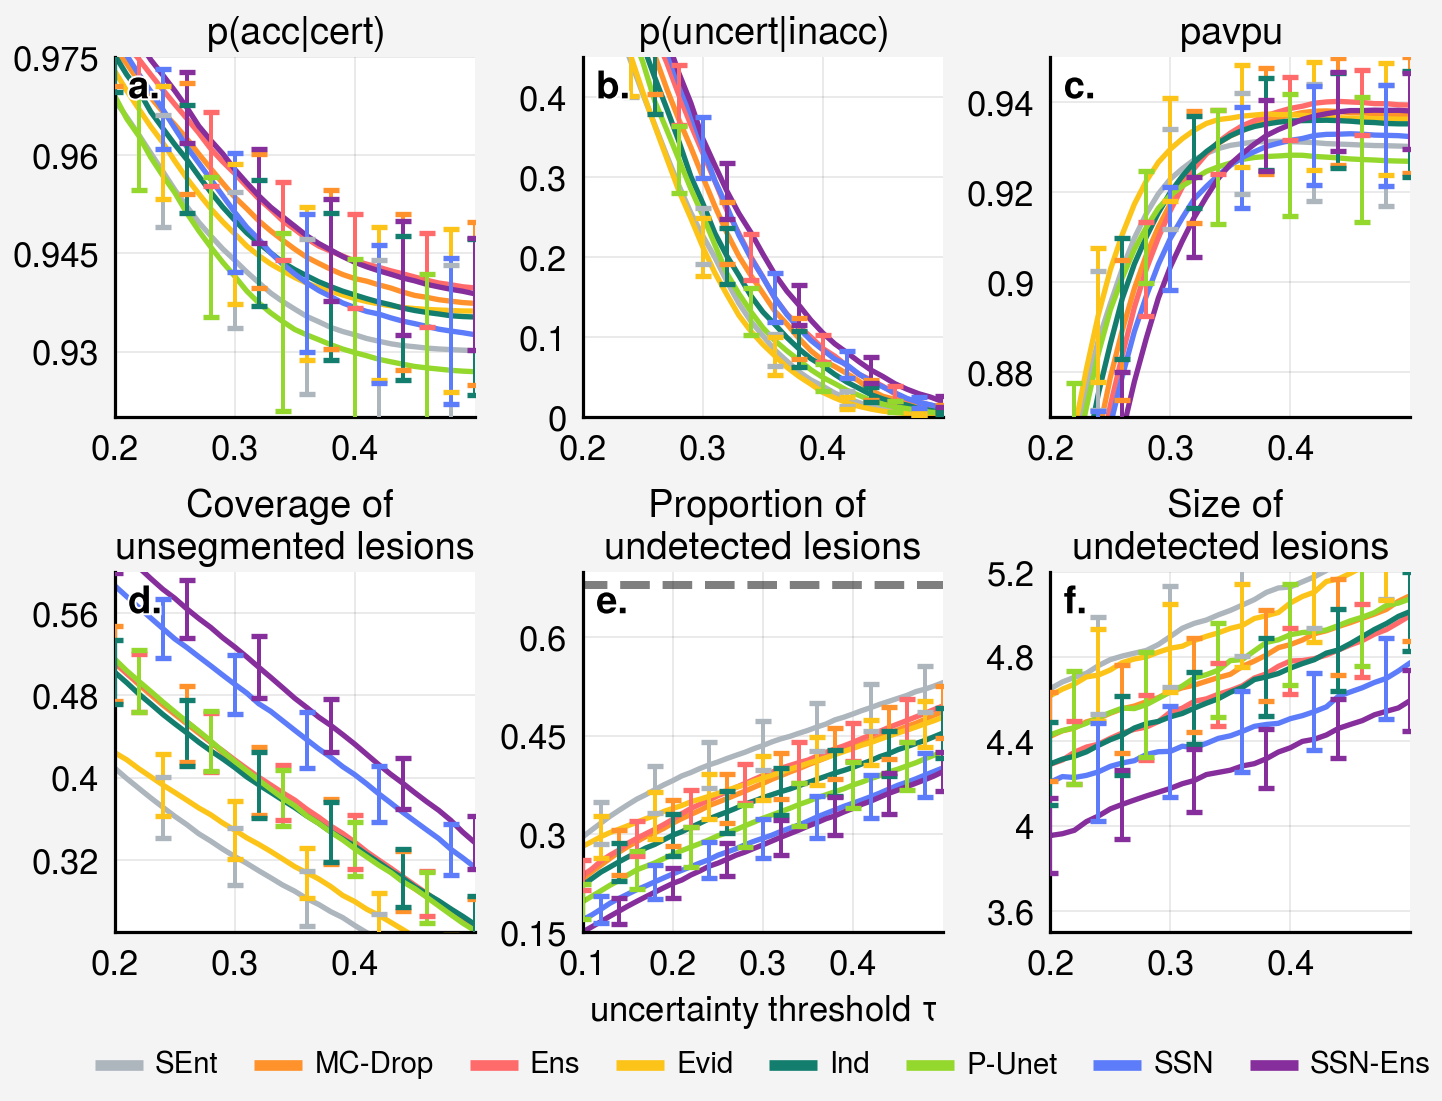

In [84]:
fig, axs = pplt.subplots(ncols=3, nrows=2, refwidth="15em", dpi=dpi, share=False, spanx=True)

at_value=0.4

metric = "p_acc_cert"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[0], out_domain_df, metric, (0.92, 0.975), 
    title="Patchwise Uncertainty Metrics (CVD)", ax_title = r"$p(acc|cert)$", ylabel='',
    marker_point=None, xlim=(0.2,0.5), variance='data', fill=False, uncertainty_types=s_utypes
)

metric = "p_uncert_inacc"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[1], out_domain_df, metric, (0., 0.45), ax_title= r"$p(uncert|inacc)$", ylabel="",
    marker_point=None, xlim=(0.2,0.5), variance='data', fill=False, uncertainty_types=s_utypes
)

metric = "pavpu"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[2], out_domain_df, metric, (0.87, 0.95), ax_title = "$pavpu$", ylabel="",
    marker_point=None, xlim=(0.2,0.5), variance='data', fill=False, uncertainty_types=s_utypes
)

metric = "mean_cov_mean_missed_lesions3d_all"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[3], out_domain_df, metric,
    ax_title="Coverage of \nunsegmented lesions", ylabel=False,
    marker_point=None, xlim=(0.2,0.5), ylim=(0.25, 0.6), variance='data', fill=False, uncertainty_types=s_utypes
)

metric = "prop_lesions_missed3d_all"
axs[4].plot([0, 1], [0.68, 0.68], '--', c='black', linewidth=3, alpha=0.5)
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[4], out_domain_df, metric, ax_title="Proportion of \nundetected lesions", ylabel=False,
    marker_point=None, xlim=(0.1,0.5), ylim=(0.15, 0.7), variance='data', fill=False, uncertainty_types=s_utypes, xlabel=True
)

metric = "mean_size_missed_lesions3d_all"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[5], out_domain_df, metric, ax_title="Size of \nundetected lesions", ylabel=False,
    marker_point=None, xlim=(0.2,0.5), ylim=(3.5, 5.2), variance='data', fill=False, uncertainty_types=s_utypes
)

for ax in axs:
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))

axs.format(fontsize=13, abc='a.', abcloc='ul')
legend = axs[4].legend(loc='bottom', ncols=8, frame=False, linewidth=4)
plt.setp(legend.get_texts(), fontsize=11)
fig.save("plots_output/datauncert_pavpu_and_lesion_coverage_OOD.pdf")

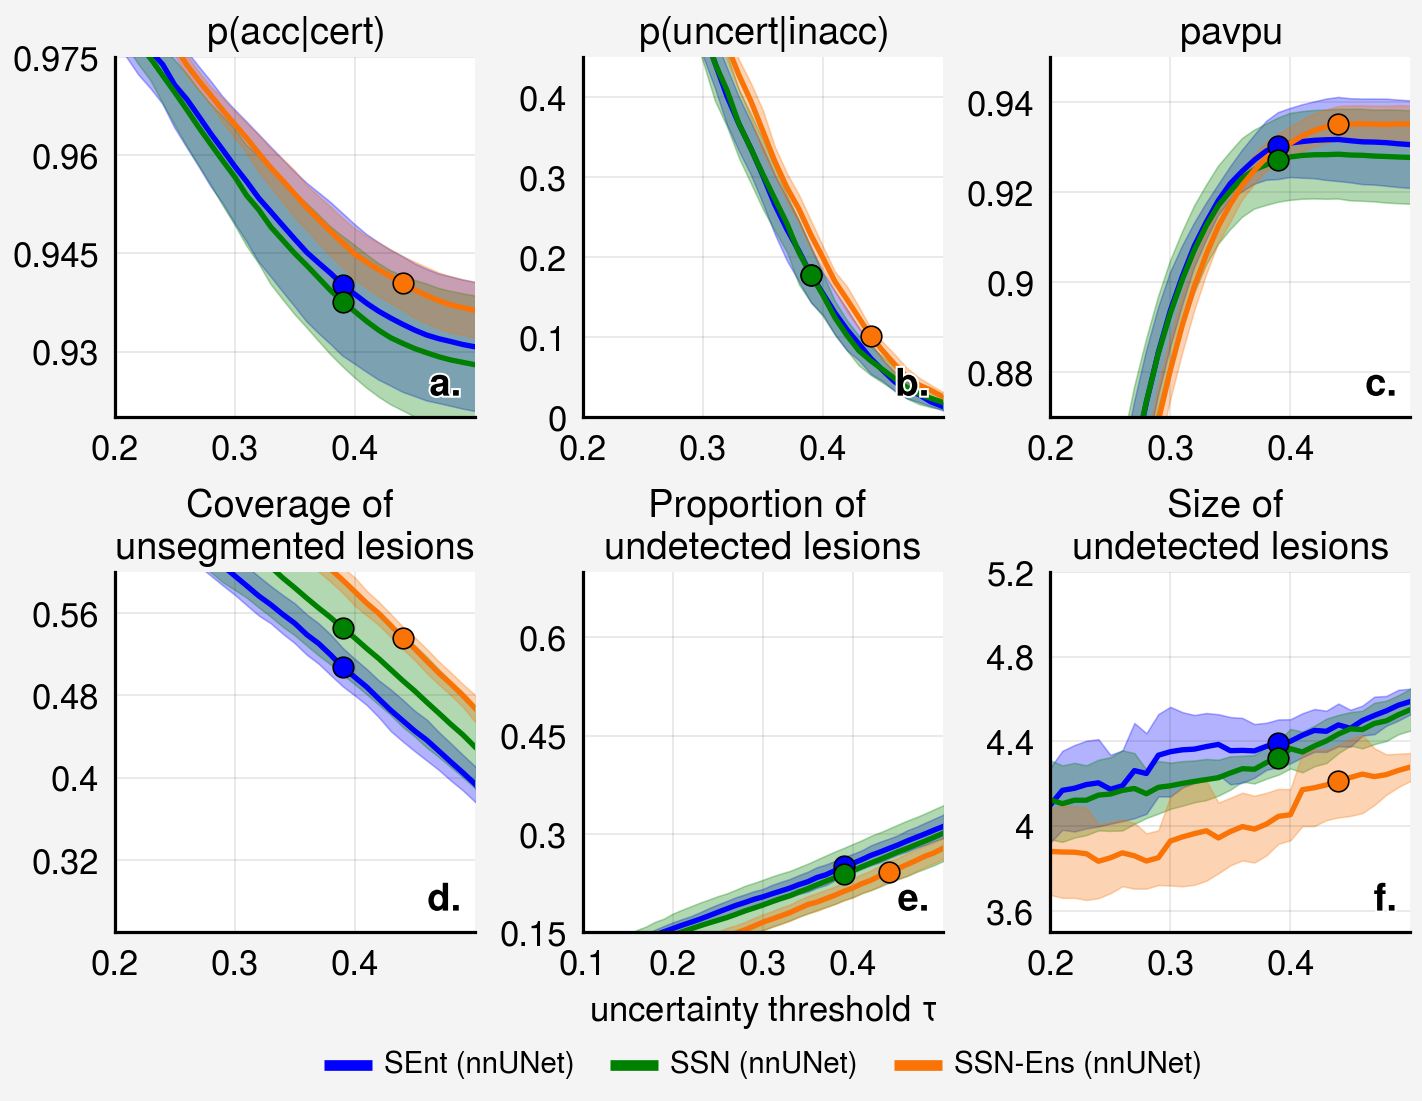

In [304]:
fig, axs = pplt.subplots(ncols=3, nrows=2, refwidth="15em", dpi=dpi, share=False, spanx=True)

at_value=0.4

metric = "p_acc_cert"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[0], out_domain_df, metric, (0.92, 0.975), 
    title="Patchwise Uncertainty Metrics (CVD)", ax_title = r"$p(acc|cert)$", ylabel='',
    marker_point=UEO_at_point(out_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.2,0.5), uncertainty_types=nn_utypes
)

metric = "p_uncert_inacc"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[1], out_domain_df, metric, (0., 0.45), ax_title= r"$p(uncert|inacc)$", ylabel="",
    marker_point=UEO_at_point(out_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.2,0.5), uncertainty_types=nn_utypes
)

metric = "pavpu"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[2], out_domain_df, metric, (0.87, 0.95), ax_title = "$pavpu$", ylabel="",
    marker_point=UEO_at_point(out_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.2,0.5), uncertainty_types=nn_utypes
)

metric = "mean_cov_mean_missed_lesions3d_all"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[3], out_domain_df, metric,
    ax_title="Coverage of \nunsegmented lesions", ylabel=False,
    marker_point=UEO_at_point(out_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.2,0.5), ylim=(0.25, 0.6), uncertainty_types=nn_utypes
)

metric = "prop_lesions_missed3d_all"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[4], out_domain_df, metric, ax_title="Proportion of \nundetected lesions", ylabel=False,
    marker_point=UEO_at_point(out_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.1,0.5), ylim=(0.15, 0.7), uncertainty_types=nn_utypes, xlabel=True
)

metric = "mean_size_missed_lesions3d_all"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[5], out_domain_df, metric, ax_title="Size of \nundetected lesions", ylabel=False,
    marker_point=UEO_at_point(out_domain_df, get_max=False, at_value=at_value, max_value=0.5), xlim=(0.2,0.5), ylim=(3.5, 5.2), uncertainty_types=nn_utypes
)

for ax in axs:
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))

axs.format(fontsize=13, abc='a.', abcloc='lr')
legend = axs[4].legend(loc='bottom', ncols=8, frame=False, linewidth=4)
plt.setp(legend.get_texts(), fontsize=11)
fig.save("plots_output/nnunet_pavpu_and_lesion_coverage_OOD.pdf")

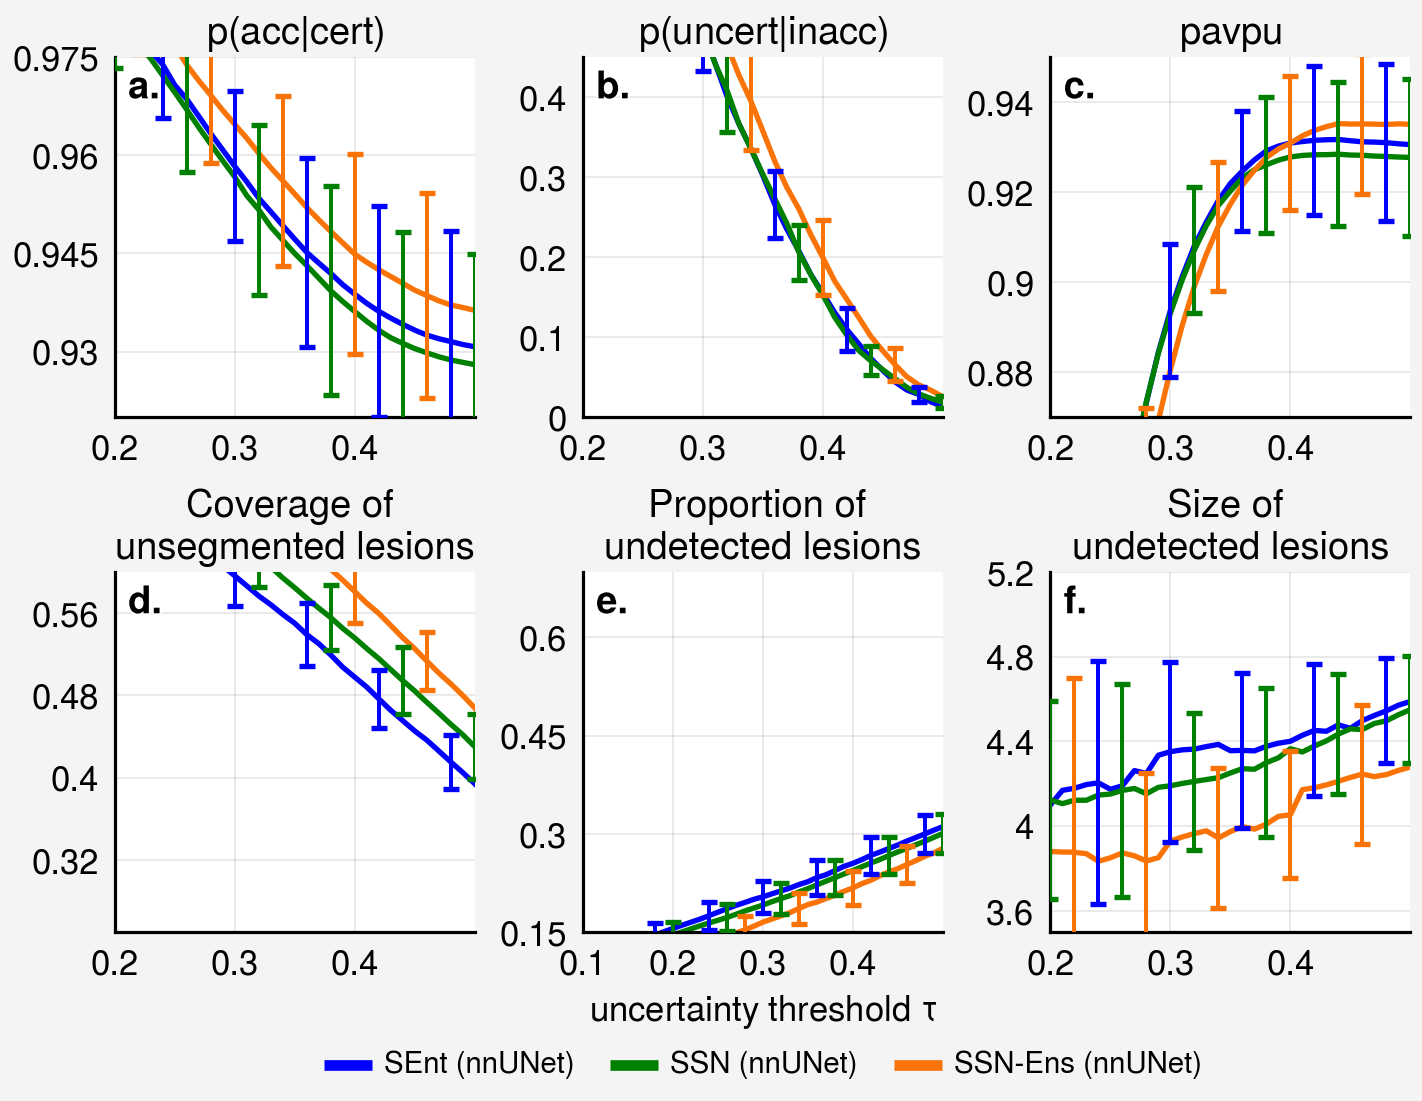

In [85]:
fig, axs = pplt.subplots(ncols=3, nrows=2, refwidth="15em", dpi=dpi, share=False, spanx=True)

at_value=0.4

metric = "p_acc_cert"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[0], out_domain_df, metric, (0.92, 0.975), 
    title="Patchwise Uncertainty Metrics (CVD)", ax_title = r"$p(acc|cert)$", ylabel='',
    marker_point=None, xlim=(0.2,0.5), variance='data', fill=False, uncertainty_types=nn_utypes
)

metric = "p_uncert_inacc"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[1], out_domain_df, metric, (0., 0.45), ax_title= r"$p(uncert|inacc)$", ylabel="",
    marker_point=None, xlim=(0.2,0.5), variance='data', fill=False, uncertainty_types=nn_utypes
)

metric = "pavpu"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[2], out_domain_df, metric, (0.87, 0.95), ax_title = "$pavpu$", ylabel="",
    marker_point=None, xlim=(0.2,0.5), variance='data', fill=False, uncertainty_types=nn_utypes
)

metric = "mean_cov_mean_missed_lesions3d_all"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[3], out_domain_df, metric,
    ax_title="Coverage of \nunsegmented lesions", ylabel=False,
    marker_point=None, xlim=(0.2,0.5), ylim=(0.25, 0.6), variance='data', fill=False, uncertainty_types=nn_utypes
)

metric = "prop_lesions_missed3d_all"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[4], out_domain_df, metric, ax_title="Proportion of \nundetected lesions", ylabel=False,
    marker_point=None, xlim=(0.1,0.5), ylim=(0.15, 0.7), variance='data', fill=False, uncertainty_types=nn_utypes, xlabel=True
)

metric = "mean_size_missed_lesions3d_all"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[5], out_domain_df, metric, ax_title="Size of \nundetected lesions", ylabel=False,
    marker_point=None, xlim=(0.2,0.5), ylim=(3.5, 5.2), variance='data', fill=False, uncertainty_types=nn_utypes
)

for ax in axs:
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))

axs.format(fontsize=13, abc='a.', abcloc='ul')
legend = axs[4].legend(loc='bottom', ncols=8, frame=False, linewidth=4)
plt.setp(legend.get_texts(), fontsize=11)
fig.save("plots_output/datauncert_nnunet_pavpu_and_lesion_coverage_OOD.pdf")

[None, None, None, None, None, None]

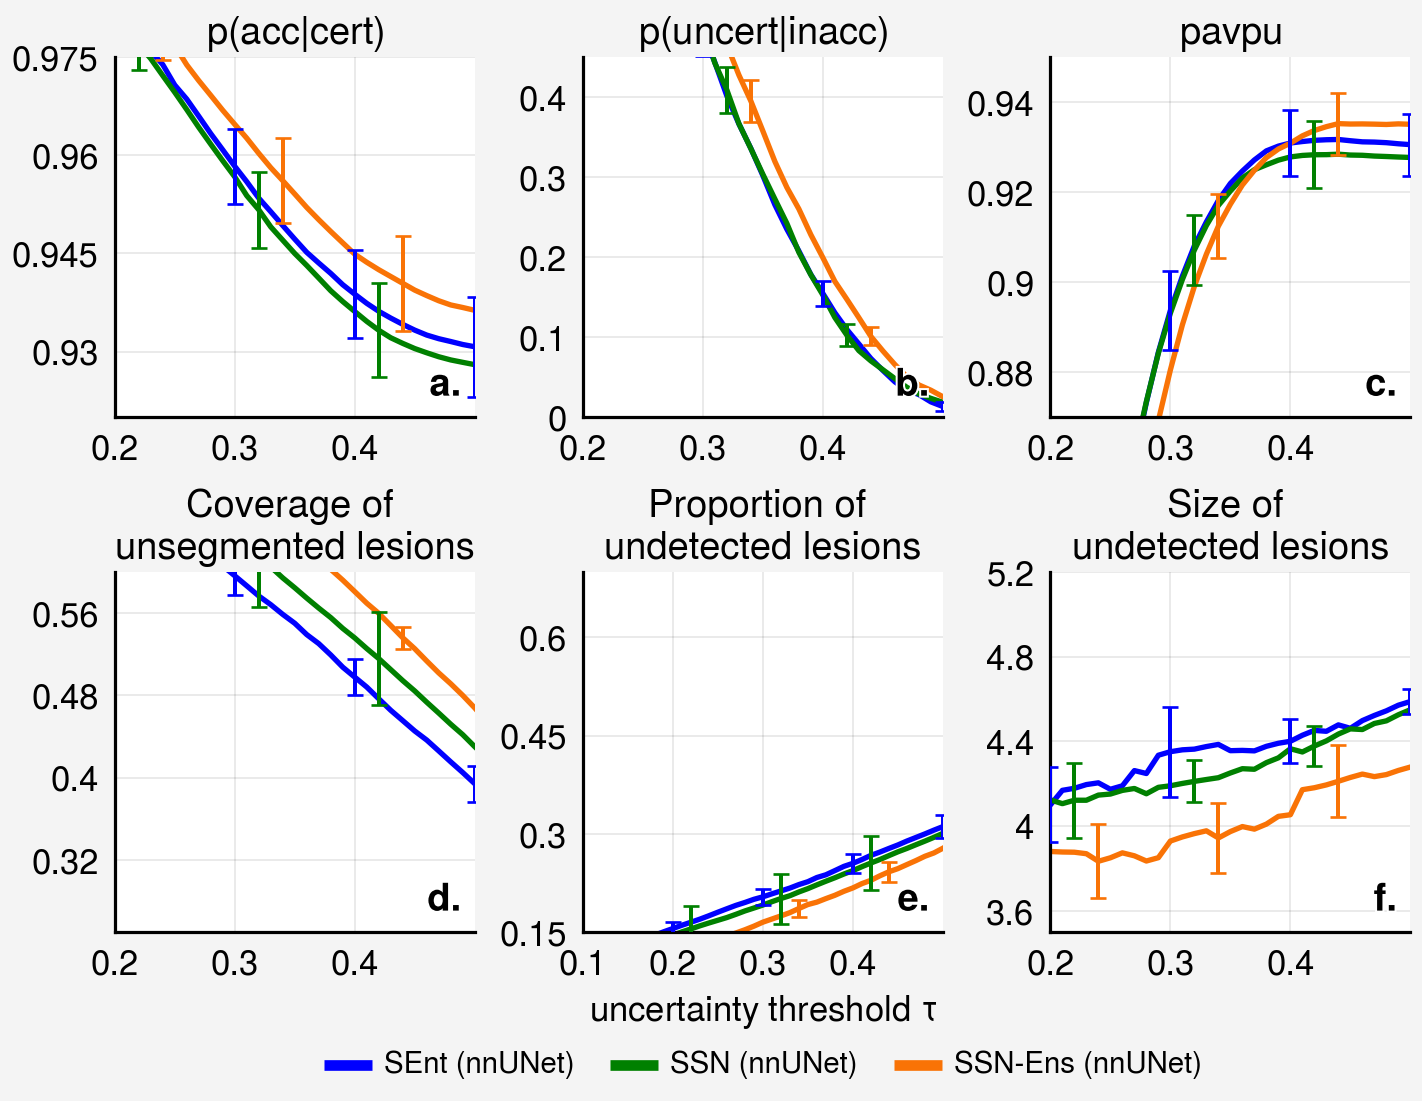

In [299]:
fig, axs = pplt.subplots(ncols=3, nrows=2, refwidth="15em", dpi=dpi, share=False, spanx=True)

at_value=0.4

metric = "p_acc_cert"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[0], out_domain_df, metric, (0.92, 0.975), 
    title="Patchwise Uncertainty Metrics (CVD)", ax_title = r"$p(acc|cert)$", ylabel='',
    marker_point=None, xlim=(0.2,0.5), variance='data', fill=False, uncertainty_types=nn_utypes
)

metric = "p_uncert_inacc"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[1], out_domain_df, metric, (0., 0.45), ax_title= r"$p(uncert|inacc)$", ylabel="",
    marker_point=None, xlim=(0.2,0.5), variance='data', fill=False, uncertainty_types=nn_utypes
)

metric = "pavpu"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[2], out_domain_df, metric, (0.87, 0.95), ax_title = "$pavpu$", ylabel="",
    marker_point=None, xlim=(0.2,0.5), variance='data', fill=False, uncertainty_types=nn_utypes
)

metric = "mean_cov_mean_missed_lesions3d_all"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[3], out_domain_df, metric,
    ax_title="Coverage of \nunsegmented lesions", ylabel=False,
    marker_point=None, xlim=(0.2,0.5), ylim=(0.25, 0.6), variance='model', fill=False, uncertainty_types=nn_utypes
)

metric = "prop_lesions_missed3d_all"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[4], out_domain_df, metric, ax_title="Proportion of \nundetected lesions", ylabel=False,
    marker_point=None, xlim=(0.1,0.5), ylim=(0.15, 0.7), variance='model', fill=False, uncertainty_types=nn_utypes, xlabel=True
)

metric = "mean_size_missed_lesions3d_all"
tmetric_df = plot_metric_for_all_thresholds_95(
    axs[5], out_domain_df, metric, ax_title="Size of \nundetected lesions", ylabel=False,
    marker_point=None, xlim=(0.2,0.5), ylim=(3.5, 5.2), variance='model', fill=False, uncertainty_types=nn_utypes
)

for ax in axs:
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))

axs.format(fontsize=13, abc='a.', abcloc='lr')
legend = axs[4].legend(loc='bottom', ncols=8, frame=False, linewidth=4)
plt.setp(legend.get_texts(), fontsize=11)
# fig.save("plots_output/datauncert_nnunet_pavpu_and_lesion_coverage_OOD.pdf")

### How to explain the tables
say that each metric is the mean value, and then the confidence value is over the folds

for the ueo dots explain that they are the points found on the training data, to see how such a threshold would generalize. Nonetheless we note that the UEO disparity is greater between the methods, in the event of access to a GT oracle to the set threshold, we may see that P-Unet yields stronger performance.

In [41]:
def format_table_as_latex(df, output_title, transpose=False):
    # build the table as a pandas df
    df = df.loc[UNCERTAINTY_TYPES]
    new_df = df.copy()
    for key in df.keys():
        if "95" in key:
            continue
        mean = df[key].values
        conf = df[key.split(" ")[0] + " 95%"].values
        dataconf = df[key.split(" ")[0] + " data95"].values
        non_nan_mean = mean.copy()
        domax = True
        for min_key in ["avd", "rmbs", "rmse", "ece", "ged"]:
            if min_key in key.lower():
                domax = False
                break
        non_nan_mean[np.isnan(mean)] = (0 if domax else 1000)
        best = np.isclose(non_nan_mean, (np.max(non_nan_mean) if domax else np.min(non_nan_mean)), 1e-3)
        
        left_align = np.max(mean) > 10
        
        new_df[key.split(" ")[0]] = [
            "\multicolumn{1}{c}{\\textemdash}" if np.isnan(mean) else 
                (
                    ("\multicolumn{1}{l}{" if left_align else "")
                    + ("$\\bm{" if best else "")
                    + (f"{mean:.2f}" if "avd" not in key else f"{mean:.1f}")
                    + ("}$" if best else "")
                    + (f" $\pm$ {conf:.2f} ({dataconf:.2f})" if "avd" not in key else f" $\pm$ {conf:.1f} ({dataconf:.1f})")
                    + ("}" if left_align else "")
                )
            
            for (mean, conf, dataconf, best) in zip(mean, conf, dataconf, best)
        ]
        new_df = new_df.drop(columns=[key, key.split(" ")[0] + " 95%", key.split(" ")[0] + " data95"])
        
    if transpose:
        new_df = new_df.transpose()
    new_df.to_csv(f"{output_title}.csv")
    
    
    lines = ["\\begin{table}[]"]
    num_columns = len(new_df.keys())
    lines.append("\\begin{tabular}{@{}l" + ''.join(['r' for _ in range(num_columns)]) + "@{}}")
    lines.append("\\toprule")
    
    heading_row = []
    index = new_df.index.name
    if index is None:
        index = ""
    heading_row.append(index + " & ")
    for key in new_df.keys():
        key_format = key.replace("_", "\_")
        heading_row.append("\multicolumn{1}{c}{"+key_format+"}")
        heading_row.append(" & ") 
    heading_row = heading_row[:-1]
    heading_row.append(" \\\\ \midrule")
    heading_row = ''.join(heading_row)
    lines.append(heading_row)
    
    for irow in range(new_df.shape[0]):
        row_values = new_df.iloc[irow]
        row_line = []
        row_line.append(new_df.index[irow] + " & ")
        for value in row_values:
            row_line.append(value)
            row_line.append(" & ")
        row_line = row_line[:-1]
        row_line.append(" \\\\ ")
    
        if irow == new_df.shape[0] - 1:
            row_line.append(" \\bottomrule")
            
        row_line = ''.join([str(v) for v in row_line])
        lines.append(row_line)
    
    lines.append("\end{tabular}")
    lines.append("\end{table}")
    
    with open(f"{output_title}_latex.txt", "w") as f:
        for line in lines:
            f.write(line)
            f.write("\n")
    
    return new_df
    
    

In [42]:
pd.set_option('display.float_format',
      lambda x: '{:,.2f}'.format(x) if abs(x) < 2 else '{:,.2}'.format(x))

In [43]:
dfs = []
for key in ["voxelwise_precision", "voxelwise_recall"]:
    dfs.append(mean_and_95_conf_over_cvfold(in_domain_df, key, return_sem=False))
standard_metrics_df = pd.concat(dfs, axis=1)
standard_metrics_df

voxelwise_precision mean  voxelwise_precision 95%   
uncertainty_type                                                      
Ens                                   0.76                     0.02  \
Evid                                  0.74                     0.02   
Ind                                   0.74                     0.03   
MC-Drop                               0.76                     0.01   
P-Unet                                0.73                     0.02   
SEnt                                  0.73                     0.03   
SEnt (nnUNet)                          NaN                      NaN   
SSN                                   0.73                     0.02   
SSN (nnUNet)                           NaN                      NaN   
SSN-Ens                               0.76                     0.02   
SSN-Ens (nnUNet)                       NaN                      NaN   

                  voxelwise_precision data95  voxelwise_recall mean   
uncertainty_type                                                      
Ens                                     0.02                   0.63  \
Evid                                    0.02                   0.64   
Ind                                     0.03                   0.65   
MC-Drop                                 0.02                   0.62   
P-Unet                                  0.02                   0.67   
SEnt                                    0.03                   0.63   
SEnt (nnUNet)                            NaN                    NaN   
SSN                                     0.03                   0.66   
SSN (nnUNet)                             NaN                    NaN   
SSN-Ens                                 0.02                   0.66   
SSN-Ens (nnUNet)                         NaN                    NaN   

                  voxelwise_recall 95%  voxelwise_recall data95  
uncertainty_type                                                 
Ens                               0.02                     0.02  
Evid                              0.02                     0.02  
Ind                               0.03                     0.02  
MC-Drop                           0.02                     0.02  
P-Unet                            0.04                     0.02  
SEnt                              0.03                     0.02  
SEnt (nnUNet)                      NaN                      NaN  
SSN                               0.02                     0.02  
SSN (nnUNet)                       NaN                      NaN  
SSN-Ens                           0.02                     0.02  
SSN-Ens (nnUNet)                   NaN                      NaN

In [44]:
dfs = []
for key in ["dice", "best_dice", "avd", "best_avd", "f1"]:
    dfs.append(mean_and_95_conf_over_cvfold(in_domain_df, key, return_sem=False))
standard_metrics_df = pd.concat(dfs, axis=1)
standard_metrics_df
# print(standard_metrics_df.to_latex(index=True))


dice mean  dice 95%  dice data95  best_dice mean   
uncertainty_type                                                     
Ens                    0.67      0.02         0.02            0.68  \
Evid                   0.67      0.02         0.02             NaN   
Ind                    0.67      0.02         0.02            0.67   
MC-Drop                0.67      0.02         0.02            0.68   
P-Unet                 0.68      0.02         0.02            0.68   
SEnt                   0.65      0.02         0.02             NaN   
SEnt (nnUNet)          0.71      0.01         0.02             NaN   
SSN                    0.68      0.02         0.02            0.70   
SSN (nnUNet)           0.70      0.01         0.02            0.72   
SSN-Ens                0.69      0.02         0.02            0.70   
SSN-Ens (nnUNet)       0.71      0.01         0.02            0.72   

                  best_dice 95%  best_dice data95  avd mean  avd 95%   
uncertainty_type                                                       
Ens                        0.01              0.02   2.9e+01      4.1  \
Evid                        NaN               NaN   2.8e+01      5.1   
Ind                        0.02              0.02   2.8e+01      4.9   
MC-Drop                    0.02              0.02   2.9e+01      4.0   
P-Unet                     0.02              0.02   2.7e+01      4.2   
SEnt                        NaN               NaN   3.1e+01      5.5   
SEnt (nnUNet)               NaN               NaN   2.1e+01      2.4   
SSN                        0.01              0.02   2.9e+01      5.8   
SSN (nnUNet)               0.01              0.02   2.6e+01      5.5   
SSN-Ens                    0.01              0.02   2.6e+01      4.3   
SSN-Ens (nnUNet)           0.01              0.02   2.2e+01      3.1   

                  avd data95  best_avd mean  best_avd 95%  best_avd data95   
uncertainty_type                                                             
Ens                      3.5        1.1e+01           3.1              2.2  \
Evid                     5.0            NaN           NaN              NaN   
Ind                      5.0        2.7e+01           4.7              4.6   
MC-Drop                  3.7        1.3e+01           3.0              2.2   
P-Unet                   4.9        2.2e+01           4.6              3.3   
SEnt                     5.5            NaN           NaN              NaN   
SEnt (nnUNet)            3.8            NaN           NaN              NaN   
SSN                      5.8            6.3          1.82              2.1   
SSN (nnUNet)             4.4            4.8          1.18             1.21   
SSN-Ens                  4.1            4.9          1.18             1.14   
SSN-Ens (nnUNet)         3.5            3.5          0.52             0.56   

                  f1 mean  f1 95%  f1 data95  
uncertainty_type                              
Ens                  0.53    0.01       0.02  
Evid                 0.53    0.01       0.02  
Ind                  0.54    0.02       0.02  
MC-Drop              0.53    0.01       0.02  
P-Unet               0.55    0.02       0.02  
SEnt                 0.50    0.01       0.02  
SEnt (nnUNet)        0.59    0.01       0.02  
SSN                  0.55    0.02       0.02  
SSN (nnUNet)         0.59    0.01       0.02  
SSN-Ens              0.58    0.01       0.02  
SSN-Ens (nnUNet)     0.60    0.01       0.02

In [45]:
# format_table_as_latex(standard_metrics_df, "in_domain_performance_stats")

In [87]:
dfs = []
for key in ["dice", "best_dice", "avd", "best_avd", "f1"]:
    dfs.append(mean_and_95_conf_over_cvfold(out_domain_df, key, return_sem=False))
standard_metrics_df = pd.concat(dfs, axis=1)
format_table_as_latex(standard_metrics_df, "out_domain_performance_stats")

dice   
uncertainty_type                                  
SEnt                     0.67 $\pm$ 0.00 (0.04)  \
MC-Drop                  0.68 $\pm$ 0.00 (0.04)   
Ens                      0.69 $\pm$ 0.00 (0.03)   
Evid                     0.68 $\pm$ 0.01 (0.04)   
Ind                      0.69 $\pm$ 0.01 (0.03)   
P-Unet                   0.68 $\pm$ 0.01 (0.04)   
SSN                      0.68 $\pm$ 0.01 (0.03)   
SSN-Ens                  0.70 $\pm$ 0.00 (0.03)   
SEnt (nnUNet)            0.70 $\pm$ 0.01 (0.04)   
SEnt (nnUNet 3D)         0.66 $\pm$ 0.01 (0.03)   
SSN (nnUNet)             0.70 $\pm$ 0.01 (0.03)   
SSN-Ens (nnUNet)  $\bm{0.72}$ $\pm$ 0.00 (0.03)   

                                        best_dice   
uncertainty_type                                    
SEnt              \multicolumn{1}{c}{\textemdash}  \
MC-Drop                    0.70 $\pm$ 0.00 (0.04)   
Ens                        0.69 $\pm$ 0.00 (0.03)   
Evid              \multicolumn{1}{c}{\textemdash}   
Ind                        0.69 $\pm$ 0.01 (0.03)   
P-Unet                     0.69 $\pm$ 0.01 (0.04)   
SSN                        0.71 $\pm$ 0.01 (0.03)   
SSN-Ens                    0.72 $\pm$ 0.00 (0.02)   
SEnt (nnUNet)     \multicolumn{1}{c}{\textemdash}   
SEnt (nnUNet 3D)  \multicolumn{1}{c}{\textemdash}   
SSN (nnUNet)               0.74 $\pm$ 0.00 (0.03)   
SSN-Ens (nnUNet)    $\bm{0.74}$ $\pm$ 0.00 (0.03)   

                                                               avd   
uncertainty_type                                                     
SEnt                     \multicolumn{1}{l}{50.2 $\pm$ 5.1 (27.8)}  \
MC-Drop                  \multicolumn{1}{l}{46.5 $\pm$ 3.7 (23.7)}   
Ens               \multicolumn{1}{l}{$\bm{42.7}$ $\pm$ 1.3 (17.2)}   
Evid                     \multicolumn{1}{l}{49.2 $\pm$ 6.1 (22.5)}   
Ind                      \multicolumn{1}{l}{50.1 $\pm$ 6.0 (22.8)}   
P-Unet                   \multicolumn{1}{l}{55.4 $\pm$ 9.9 (23.3)}   
SSN                      \multicolumn{1}{l}{55.0 $\pm$ 8.7 (18.9)}   
SSN-Ens                  \multicolumn{1}{l}{43.8 $\pm$ 2.3 (14.3)}   
SEnt (nnUNet)            \multicolumn{1}{l}{51.2 $\pm$ 7.9 (24.5)}   
SEnt (nnUNet 3D)         \multicolumn{1}{l}{61.3 $\pm$ 8.5 (19.7)}   
SSN (nnUNet)             \multicolumn{1}{l}{49.0 $\pm$ 8.8 (21.5)}   
SSN-Ens (nnUNet)         \multicolumn{1}{l}{45.6 $\pm$ 4.9 (21.6)}   

                                         best_avd   
uncertainty_type                                    
SEnt              \multicolumn{1}{c}{\textemdash}  \
MC-Drop                     23.9 $\pm$ 3.2 (15.3)   
Ens                          19.2 $\pm$ 2.0 (9.8)   
Evid              \multicolumn{1}{c}{\textemdash}   
Ind                         48.1 $\pm$ 5.9 (21.9)   
P-Unet                      39.2 $\pm$ 6.7 (19.2)   
SSN                          17.1 $\pm$ 4.3 (9.1)   
SSN-Ens                      12.3 $\pm$ 1.1 (6.7)   
SEnt (nnUNet)     \multicolumn{1}{c}{\textemdash}   
SEnt (nnUNet 3D)  \multicolumn{1}{c}{\textemdash}   
SSN (nnUNet)                 13.4 $\pm$ 3.5 (8.8)   
SSN-Ens (nnUNet)      $\bm{11.0}$ $\pm$ 1.8 (7.9)   

                                             f1  
uncertainty_type                                 
SEnt                     0.47 $\pm$ 0.01 (0.02)  
MC-Drop                  0.50 $\pm$ 0.00 (0.03)  
Ens                      0.51 $\pm$ 0.00 (0.02)  
Evid                     0.52 $\pm$ 0.01 (0.03)  
Ind                      0.53 $\pm$ 0.01 (0.02)  
P-Unet                   0.54 $\pm$ 0.02 (0.03)  
SSN                      0.53 $\pm$ 0.01 (0.02)  
SSN-Ens                  0.57 $\pm$ 0.00 (0.02)  
SEnt (nnUNet)            0.59 $\pm$ 0.01 (0.02)  
SEnt (nnUNet 3D)         0.62 $\pm$ 0.01 (0.02)  
SSN (nnUNet)             0.61 $\pm$ 0.02 (0.02)  
SSN-Ens (nnUNet)  $\bm{0.63}$ $\pm$ 0.01 (0.02)

### for the 3d nnunet:

dice is 0.66 and avd is 0.61 so poor on both counts. moving on.

### note to self

okay good progress with the table, but let's flip its orientation and see what we get, also need to put the bold in.

In [47]:
# dfs = []
# for key in ["rmse", "sUEO", "GED^2"]:
#     dfs.append(mean_and_95_conf_over_cvfold(in_domain_df, key, return_sem=False))
# uncert_metrics_df = pd.concat(dfs, axis=1)
# format_table_as_latex(uncert_metrics_df, "in_domain_uncert_metrics")

In [88]:
dfs = []
for key in ["sUEO", "GED^2"]:
    dfs.append(mean_and_95_conf_over_cvfold(out_domain_df, key, return_sem=False))#
uncert_metrics_df = pd.concat(dfs, axis=1)
format_table_as_latex(uncert_metrics_df, "out_domain_uncert_metrics")

sUEO   
uncertainty_type                                  
SEnt                     0.47 $\pm$ 0.00 (0.01)  \
MC-Drop                  0.47 $\pm$ 0.01 (0.01)   
Ens                      0.46 $\pm$ 0.00 (0.01)   
Evid                     0.48 $\pm$ 0.00 (0.01)   
Ind                      0.48 $\pm$ 0.01 (0.01)   
P-Unet            $\bm{0.50}$ $\pm$ 0.01 (0.01)   
SSN                      0.46 $\pm$ 0.00 (0.01)   
SSN-Ens                  0.46 $\pm$ 0.00 (0.01)   
SEnt (nnUNet)            0.47 $\pm$ 0.01 (0.01)   
SEnt (nnUNet 3D)         0.50 $\pm$ 0.00 (0.01)   
SSN (nnUNet)             0.47 $\pm$ 0.01 (0.01)   
SSN-Ens (nnUNet)         0.45 $\pm$ 0.00 (0.01)   

                                            GED^2  
uncertainty_type                                   
SEnt              \multicolumn{1}{c}{\textemdash}  
MC-Drop                    0.73 $\pm$ 0.00 (0.07)  
Ens                        0.66 $\pm$ 0.00 (0.04)  
Evid              \multicolumn{1}{c}{\textemdash}  
Ind                        0.89 $\pm$ 0.02 (0.07)  
P-Unet                     0.87 $\pm$ 0.02 (0.08)  
SSN                        0.71 $\pm$ 0.03 (0.06)  
SSN-Ens                    0.63 $\pm$ 0.01 (0.04)  
SEnt (nnUNet)     \multicolumn{1}{c}{\textemdash}  
SEnt (nnUNet 3D)  \multicolumn{1}{c}{\textemdash}  
SSN (nnUNet)               0.66 $\pm$ 0.02 (0.06)  
SSN-Ens (nnUNet)    $\bm{0.61}$ $\pm$ 0.01 (0.06)

In [52]:
# dfs = []
# for key in ["rmse", "best_rmse"]:
#     dfs.append(mean_and_95_conf_over_cvfold(in_domain_df, key, return_sem=False))
# uncert_metrics_df = pd.concat(dfs, axis=1)
# format_table_as_latex(uncert_metrics_df, "in_domain_rmbs_metrics")

In [114]:
dfs = []
for key in ["rmse", "best_rmse"]:
    dfs.append(mean_and_95_conf_over_cvfold(out_domain_df, key, return_sem=False))
uncert_metrics_df = pd.concat(dfs, axis=1)
format_table_as_latex(uncert_metrics_df, "out_domain_rmbs_metrics")

rmse                        best_rmse
uncertainty_type                                                         
NNUNET                   0.65 $\pm$ 0.02  \multicolumn{1}{c}{\textemdash}
NNUNETSSN         $\bm{0.58}$ $\pm$ 0.02           $\bm{0.55}$ $\pm$ 0.02
NNUNETSSNV1              0.59 $\pm$ 0.01                  0.55 $\pm$ 0.01
NNUNETSSNV4              0.59 $\pm$ 0.02                  0.55 $\pm$ 0.02
NNUNET2D          $\bm{0.58}$ $\pm$ 0.01  \multicolumn{1}{c}{\textemdash}

### Per individual volume plots

In [47]:
from sklearn.metrics import r2_score
import scipy.stats as stats
import scipy

def plot_metric_per_volume(ax, df, utype, metric, ylabel, scatter=False):
    rdf = df[df['uncertainty_type'] == utype][['gt_vols',metric, 'cv_fold']].groupby(['gt_vols'])
    x = rdf['gt_vols'].mean().values
    # print(x)
    y = rdf[metric].mean().values
    x = x[~np.isnan(y)]  * 0.003
    xl = np.log(x)
    y = y[~np.isnan(y)]
    # yl = np.log(y+1)
    yl = y
    
    if scatter:
        ax.scatter(x, y, color=UNCERTAINTY_COLOURS[utype], alpha=0.4)
    
    # Fit model
    slope, intercept = np.polyfit(xl, yl, 1)

    # Predictions 
    y_pred = slope*xl + intercept   

    # print(y_pred)
    ax.set_xscale('log')
    # plt.yscale('log')
    ax.set_xlabel('GT WMH Volume (ml)')
    ax.set_ylabel(ylabel)
    
    # pearon r
    pearson_r = scipy.stats.pearsonr(xl, yl)[0]
    print("pearson_r: ", pearson_r)
    
    return x, y, y_pred, pearson_r

In [48]:
def compare_two(ax, df, metric, utype1, utype2, ylabel, title=None):
    x, y1, y1_pred, pearson_r1 = plot_metric_per_volume(ax, df, utype1, metric, ylabel=None, scatter=True)
    x, y2, y2_pred, pearson_r2 = plot_metric_per_volume(ax, df, utype2, metric, ylabel=None, scatter=True)
    
    ax.set_title(ylabel)
    
    # plot the pearson r and wilcox signed ranged test
    
    # Fisher r-to-z 
    r1 = np.corrcoef(x, y1)[0,1] 
    r2 = np.corrcoef(x, y2)[0,1]

    z1 = 0.5*np.log((1+r1)/(1-r1))
    z2 = 0.5*np.log((1+r2)/(1-r2)) 

    diff_z = z1 - z2
    se = np.sqrt(1/(len(x)-3))
    p = 1.0 - np.abs(stats.norm.cdf(np.abs(diff_z)/se)) 

    print(p) 

    # Wilcoxon Signed Rank Test
    _, p = stats.wilcoxon(y1, y2)  
    print(f"wilcox for {metric}: {p:.2}")

    ax.plot(x, y1_pred, color=UNCERTAINTY_COLOURS[utype1], label=fr'{utype1} $r={pearson_r1:.2f}$', linewidth=3)
    ax.plot(x, y2_pred, color=UNCERTAINTY_COLOURS[utype2], label=fr'{utype2} $r={pearson_r2:.2f}$ ' + '\n' + fr'wilcox $p={p:.2}$', linewidth=3)
    
    # format spines
    ax.spines[['top','right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_linewidth(1.2)

pearson_r:  -0.4286048739853127
pearson_r:  -0.32139718702704645
0.019807181104208427
wilcox for best_avd: 5.8e-35
pearson_r:  0.3050365828357025
pearson_r:  0.632171465844273
6.899785771163902e-05
wilcox for sUEO: 1.5e-17
pearson_r:  -0.14554225123157985
pearson_r:  -0.6859416624730457
0.0
wilcox for sample_vd_skew: 1.3e-42


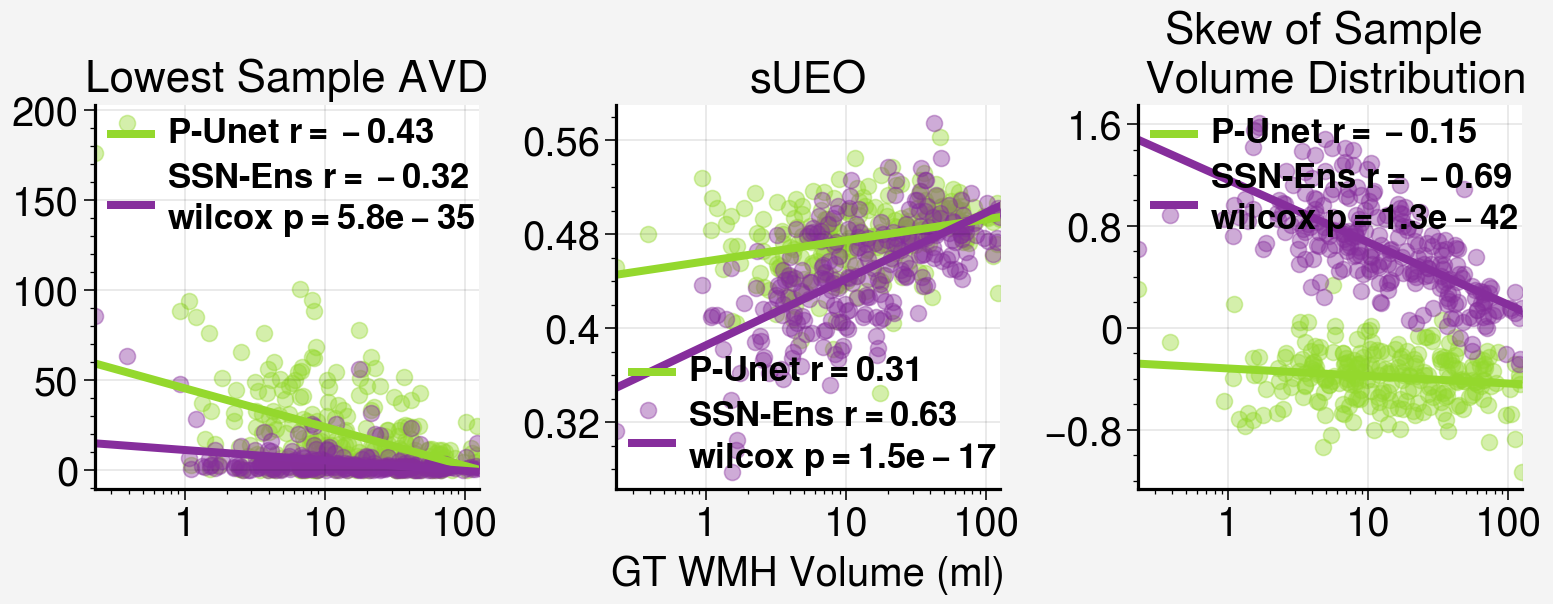

In [49]:
fig, axs = pplt.subplots(ncols=3, refwidth="16em", dpi=dpi, share=False, spanx=True)

# compare_two(axs[0], in_domain_df, "rmse", "P-Unet", "SSN-Ens", "RMBS")

compare_two(axs[0], in_domain_df, "best_avd", "P-Unet", "SSN-Ens", "Lowest Sample AVD")

compare_two(axs[1], in_domain_df, "sUEO", "P-Unet", "SSN-Ens", "sUEO")

compare_two(axs[2], in_domain_df, "sample_vd_skew", "P-Unet", "SSN-Ens", "Skew of Sample \n Volume Distribution")

axs.format(fontsize=15)
for ax in axs:
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    legend = ax.legend(loc='best', frame=False, ncols=1)
    plt.setp(legend.get_texts(), fontsize=13, fontweight='bold')
fig.save("plots_output/punet_vs_ssn_per_volume.pdf")

pearson_r:  -0.5057203865295947
pearson_r:  -0.41004179113418726
0.26134616052121706
wilcox for best_avd: 2.1e-11
pearson_r:  0.2179117201048514
pearson_r:  0.6372814289407936
0.002458066591439767
wilcox for sUEO: 1.7e-09
pearson_r:  -0.3591974938120581
pearson_r:  -0.8482138460927097
2.7538580305019877e-08
wilcox for sample_vd_skew: 1.6e-11


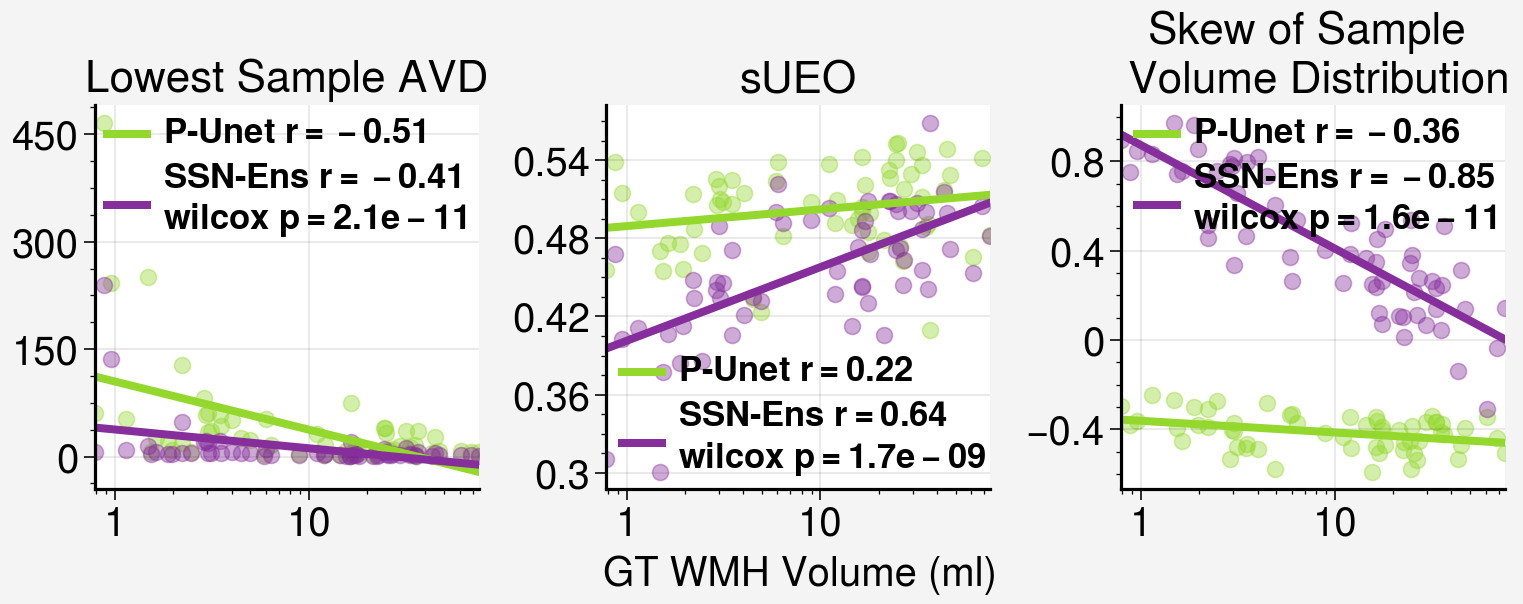

In [50]:
fig, axs = pplt.subplots(ncols=3, refwidth="16em", dpi=dpi, share=False, spanx=True)

# compare_two(axs[0], out_domain_df, "rmse", "P-Unet", "SSN-Ens", "RMBS")

compare_two(axs[0], out_domain_df, "best_avd", "P-Unet", "SSN-Ens", "Lowest Sample AVD")

compare_two(axs[1], out_domain_df, "sUEO", "P-Unet", "SSN-Ens", "sUEO")

compare_two(axs[2], out_domain_df, "sample_vd_skew", "P-Unet", "SSN-Ens", "Skew of Sample \n Volume Distribution")

axs.format(fontsize=15)
for ax in axs:
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    legend = ax.legend(loc='best', frame=False, ncols=1)
    plt.setp(legend.get_texts(), fontsize=13, fontweight='bold')
fig.save("plots_output/punet_vs_ssn_per_volume_OOD.pdf")

pearson_r:  -0.14554225123157985
pearson_r:  -0.6859416624730457
0.0
wilcox for sample_vd_skew: 1.3e-42


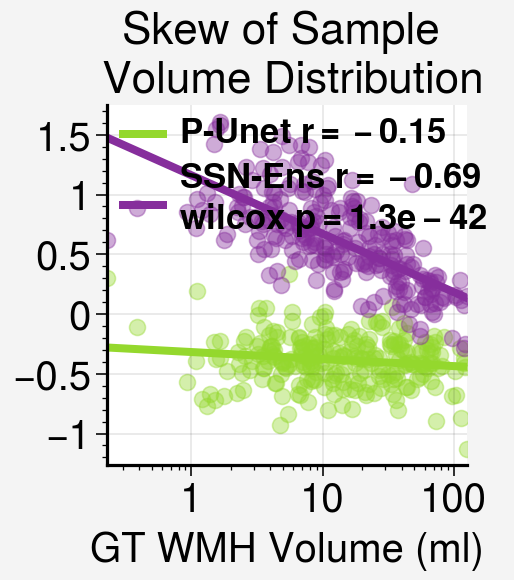

In [51]:
fig, ax = pplt.subplots(ncols=1, refwidth="15em", dpi=dpi, share=False, spanx=True)
compare_two(ax, in_domain_df, "sample_vd_skew", "P-Unet", "SSN-Ens", "Skew of Sample \n Volume Distribution")
ax.format(fontsize=15)
legend = ax.legend(loc='best', frame=False, ncols=1)
plt.setp(legend.get_texts(), fontsize=13, fontweight='bold')
fig.save("plots_output/skew_per_volume.pdf")

In [116]:
def sample_div_plot(df, uncertainty_type, merge_folds=False, ymax=400, doxlabel=True, savepath=None, refwidth="50em"):
    model_df = df[df['uncertainty_type'] == uncertainty_type]
    
    model_df = model_df[['gt_vols', 'cv_fold', 'sample_0_vd',
               'sample_1_vd', 'sample_2_vd', 'sample_3_vd', 'sample_4_vd',
               'sample_5_vd', 'sample_6_vd', 'sample_7_vd', 'sample_8_vd',
               'sample_9_vd']]

    if merge_folds:
        model_df = model_df.groupby(['gt_vols', 'cv_fold']).mean().groupby(['gt_vols']).mean()
        vols = model_df.index
    else:
        vols = model_df['gt_vols']
        model_df = model_df.drop(columns=['gt_vols', 'cv_fold'], inplace=False)

    values = model_df.values
    sorted_vols_idx = np.argsort(vols)
    values = values[sorted_vols_idx]
    values = values.T
    
    fig, ax = pplt.subplots(nrows=1, ncols=1, refwidth=refwidth, refheight="15em")
    c=UNCERTAINTY_COLOURS[uncertainty_type]
    
    box = ax.boxplot(values, fill=True, fillcolor=c, markersize=3, linewidth=1.5, zorder=2)
    print(list(box.keys()))
    for item in ['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means']:
        plt.setp(box[item], color=c)
    for median in box['medians']:
        median.set_color('black')
        median.set_linewidth(1)
    
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off

    # plt.yscale('log')
    ax.set_ylim((-100, ymax))

    
    # plot red line at volume is 0
    ax.axhline(y=0, color='red6', zorder=3)
    
    # axes style
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_linewidth(1.2)  # Thicker bottom spine
    ax.spines['left'].set_linewidth(1.2)  # Thicker left spine
    
    ax.grid(axis='x')
    
    ax.format(title=uncertainty_type, titleloc='uc', fontsize=13, ylabel="Volume Difference %", xlabel="Individuals, sorted by WMH Volume" if doxlabel else None)
    fig.save(savepath)

['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means']


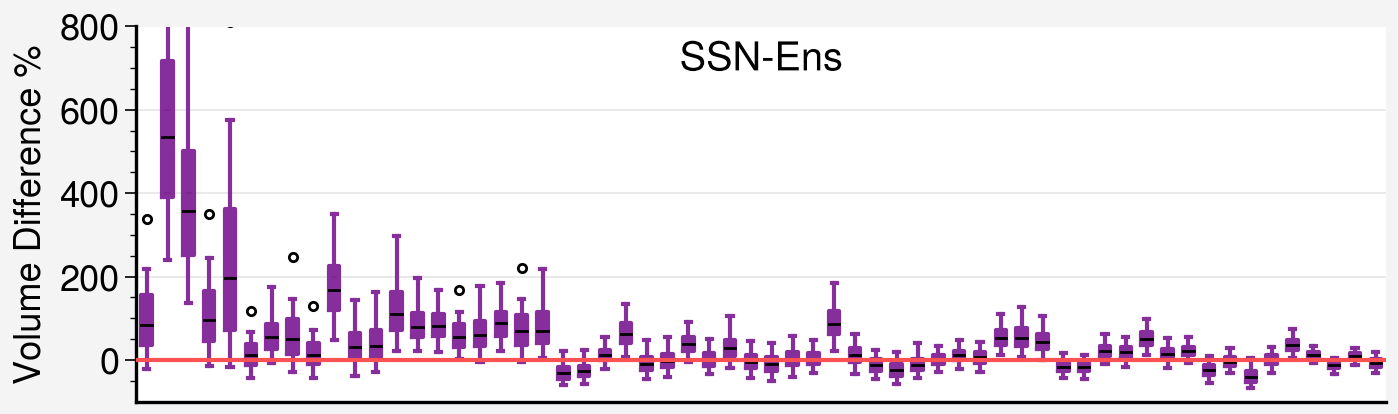

In [53]:
sample_div_plot(out_domain_df, "SSN-Ens", True, 800, False, "plots_output/sample_div_ssn_ens_OOD.pdf")

['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means']


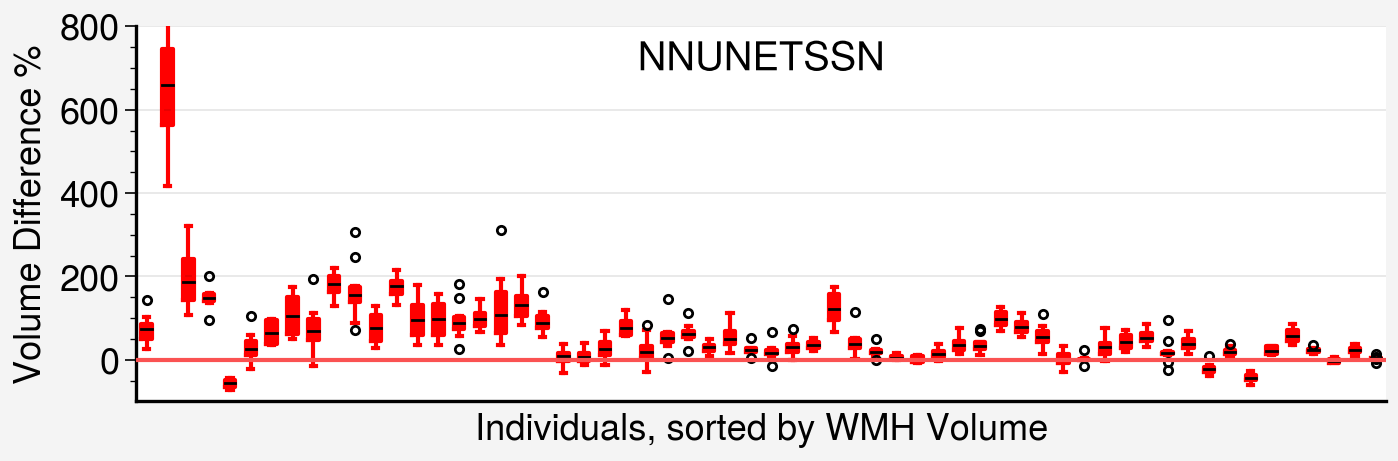

In [117]:
sample_div_plot(out_domain_df, "NNUNETSSN", True, 800, True, "plots_output/sample_div_ssn_OOD.pdf")

['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means']


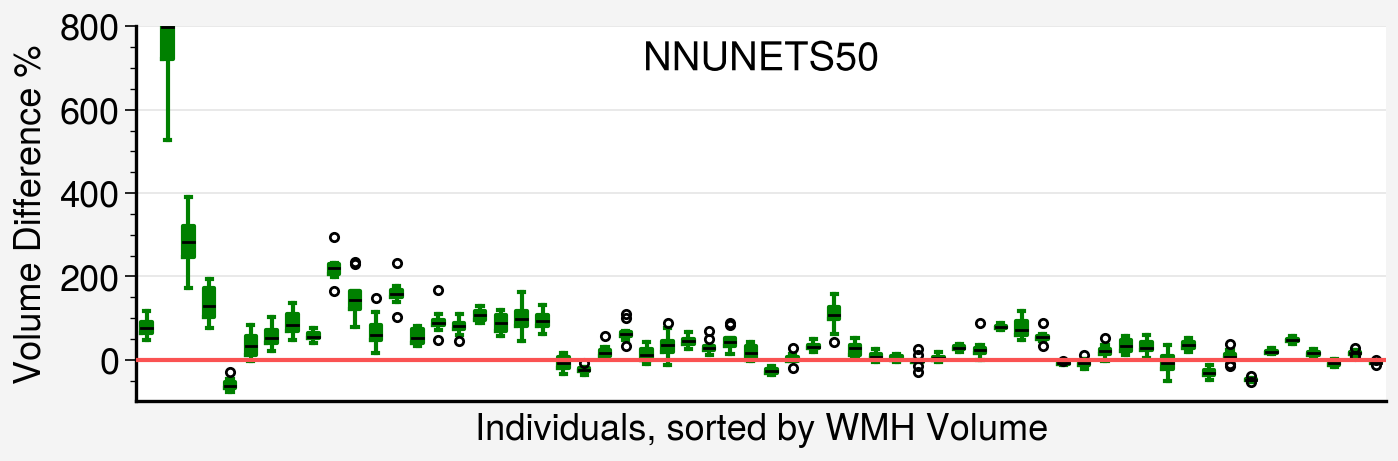

In [119]:
sample_div_plot(out_domain_df, "NNUNETS50", True, 800, True, "plots_output/sample_div_ssn_OOD.pdf")

['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means']


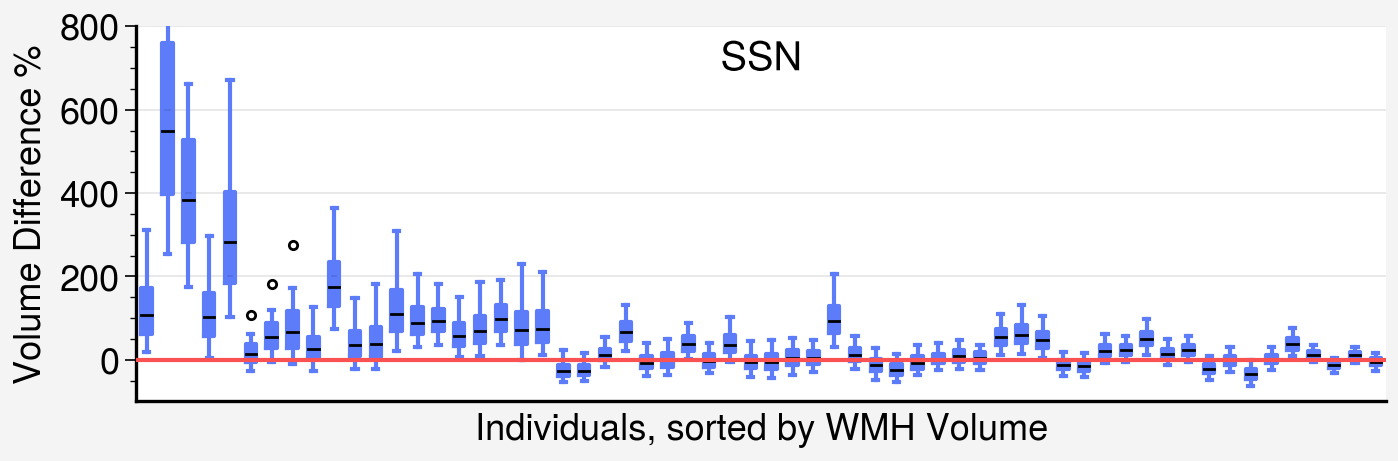

In [54]:
sample_div_plot(out_domain_df, "SSN", True, 800, True, "plots_output/sample_div_ssn_OOD.pdf")

['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means']


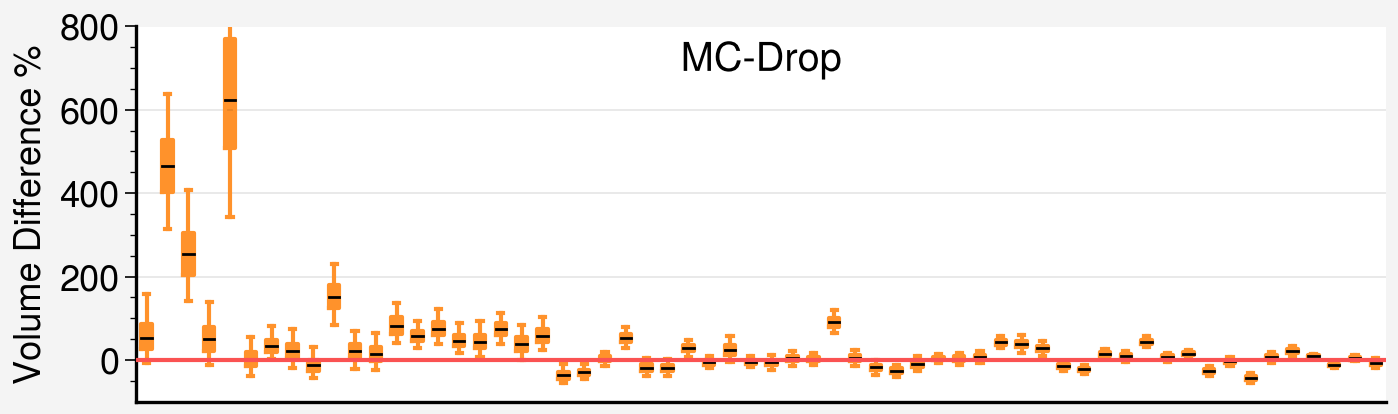

In [54]:
sample_div_plot(out_domain_df, "MC-Drop", True, 800, False, "plots_output/sample_div_mcdrop_OOD.pdf")

['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means']


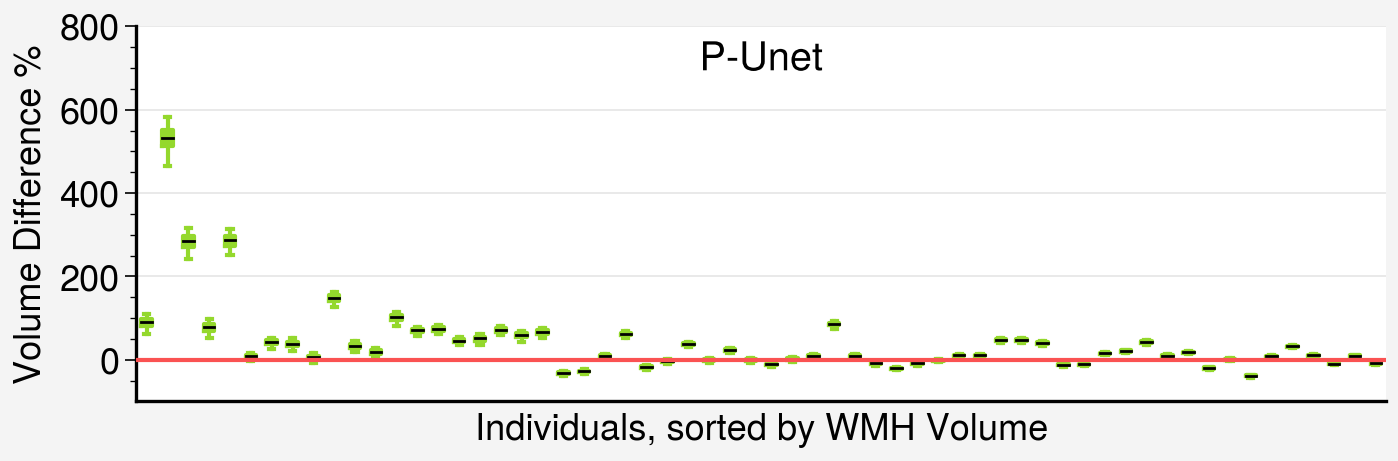

In [58]:
sample_div_plot(out_domain_df, "P-Unet", True, 800, True, "plots_output/sample_div_punet_OOD.pdf")

['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means']


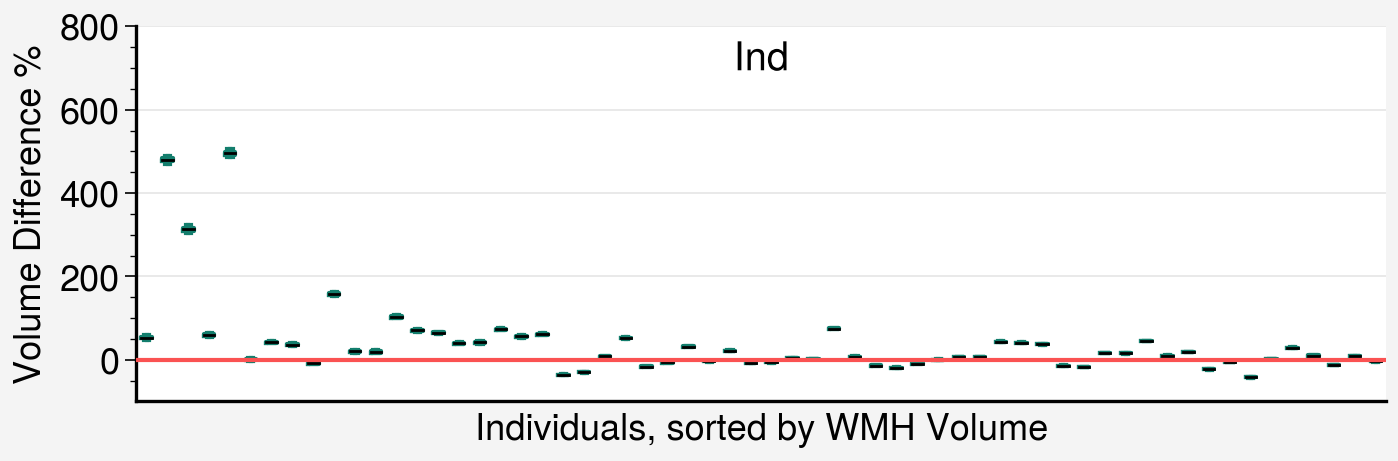

In [56]:
sample_div_plot(out_domain_df, "Ind", True, 800, True, "plots_output/sample_div_ind_OOD.pdf")

['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means']


Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exc

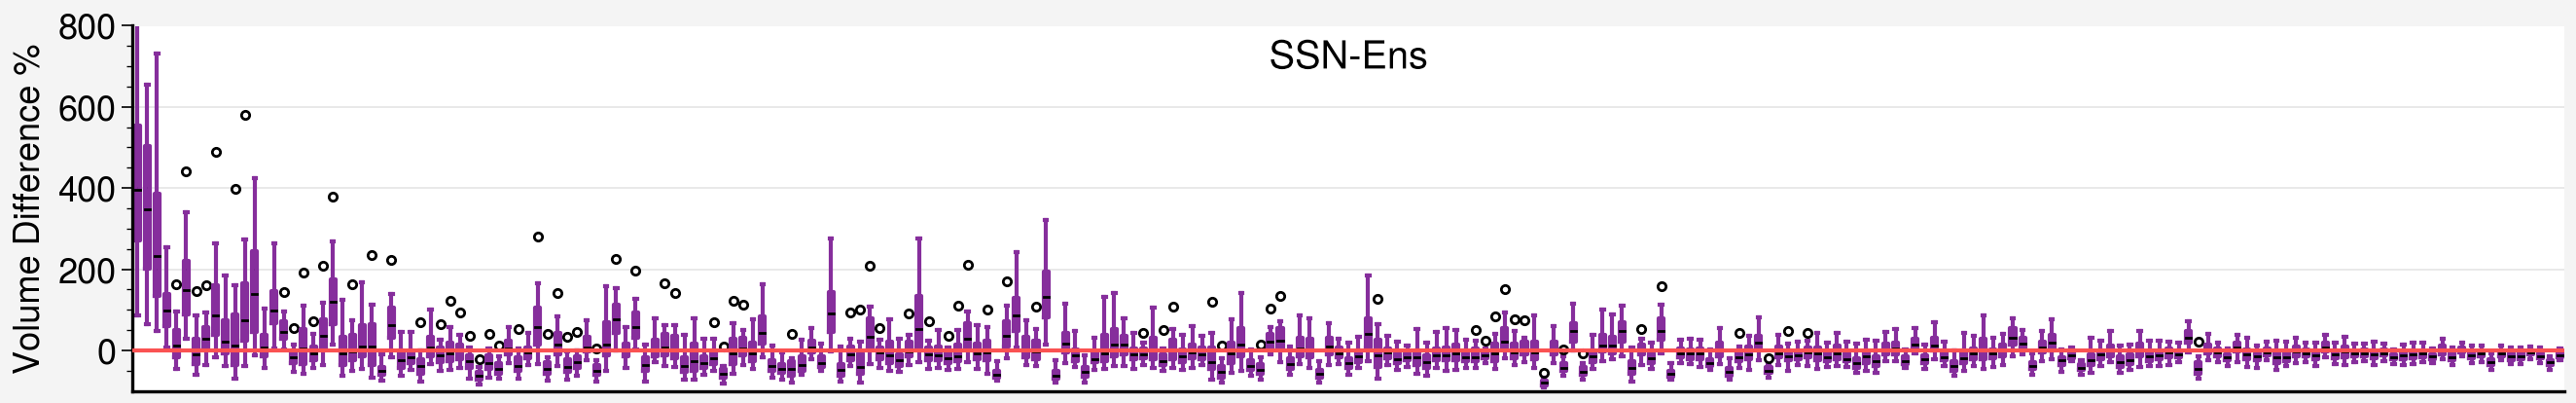

In [57]:
sample_div_plot(in_domain_df, "SSN-Ens", True, 800, False, "plots_output/sample_div_ssn_ens_inhouse.pdf", "100em")

['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means']


Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exc

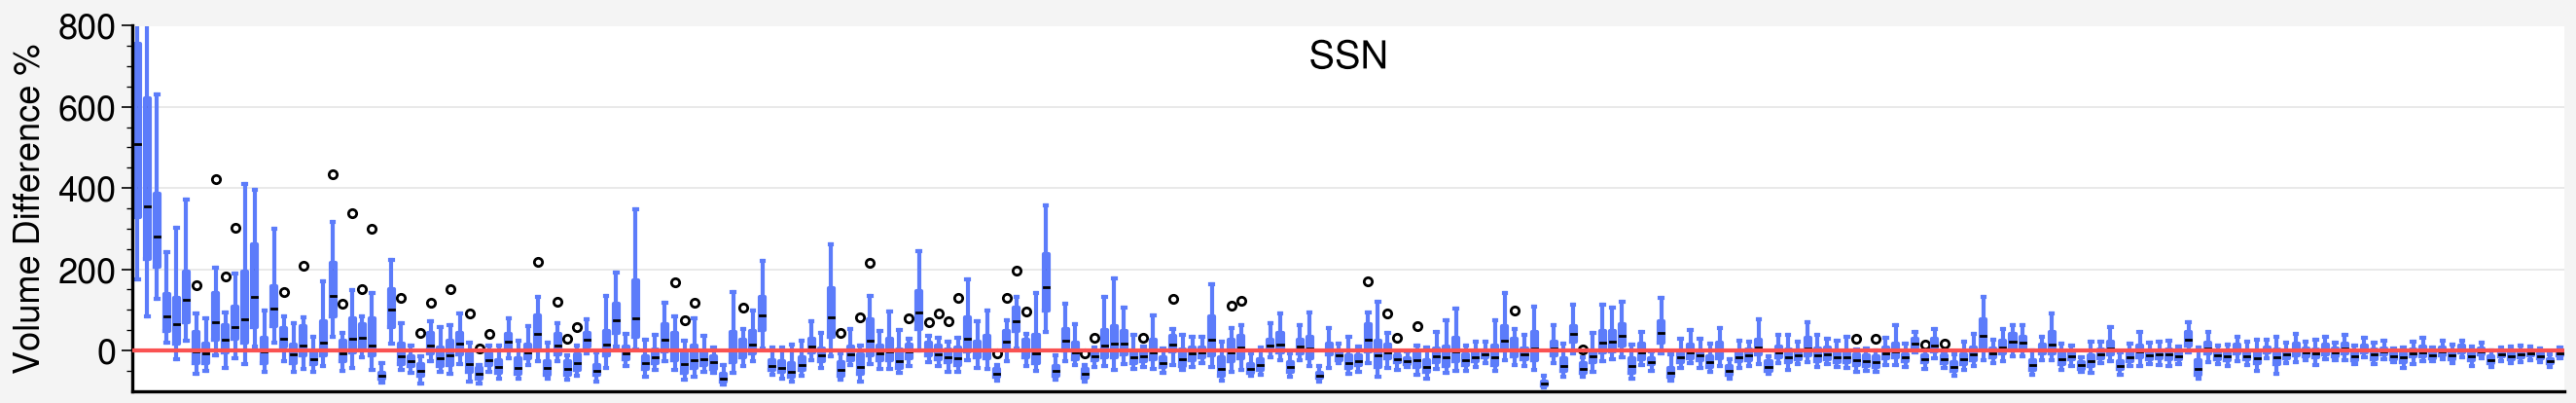

In [58]:
sample_div_plot(in_domain_df, "SSN", True, 800, False, "plots_output/sample_div_ssn_inhouse.pdf", "100em")

['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means']


Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exc

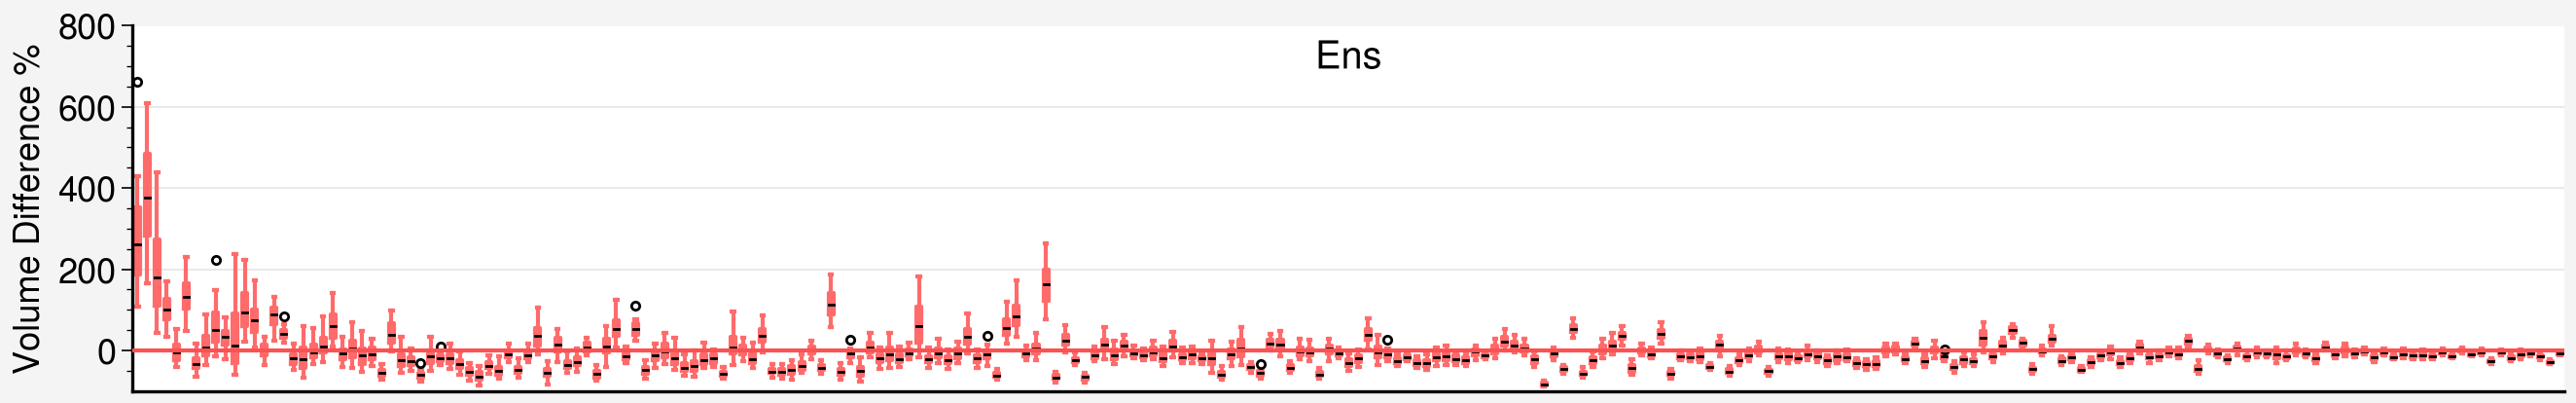

In [59]:
sample_div_plot(in_domain_df, "Ens", True, 800, False, "plots_output/sample_div_ens_inhouse.pdf", "100em")

['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means']


Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exc

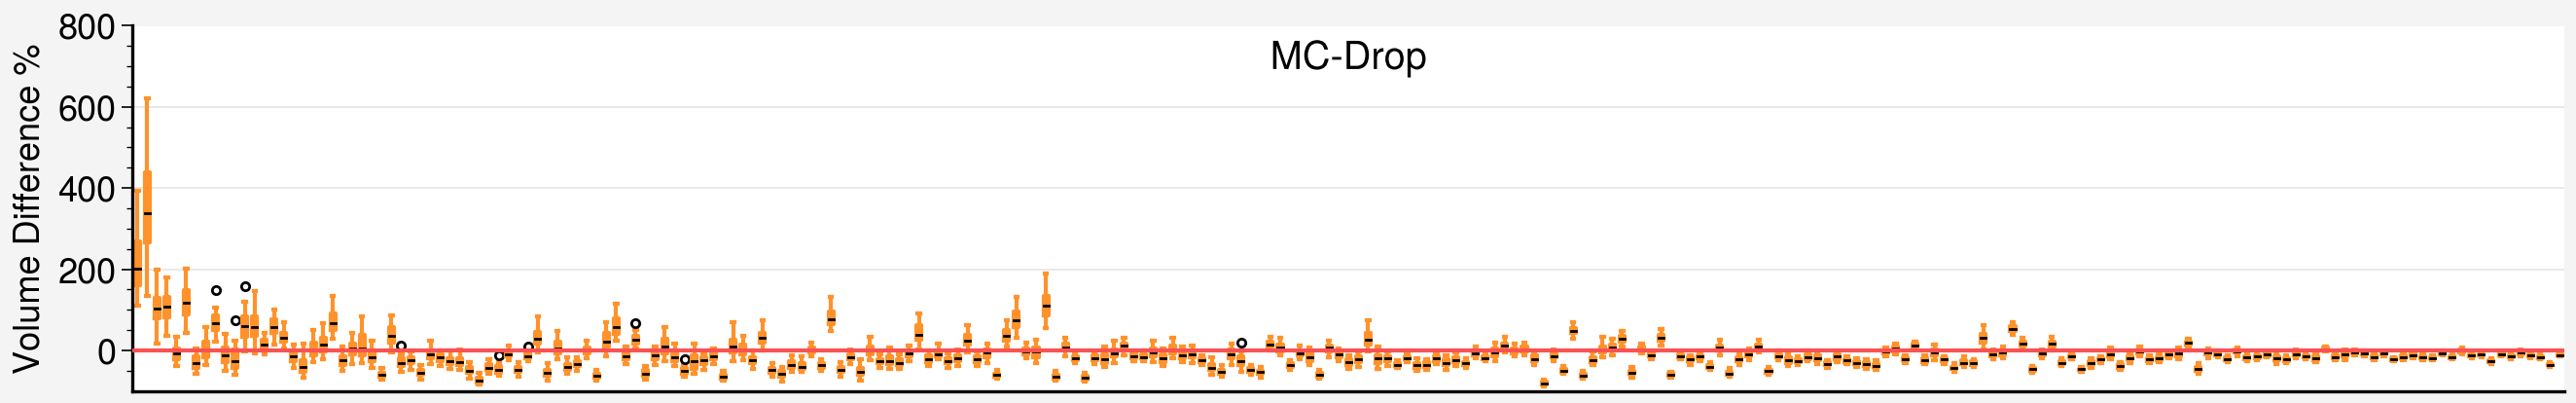

In [60]:
sample_div_plot(in_domain_df, "MC-Drop", True, 800, False, "plots_output/sample_div_mcdrop_inhouse.pdf", "100em")

['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means']


Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exc

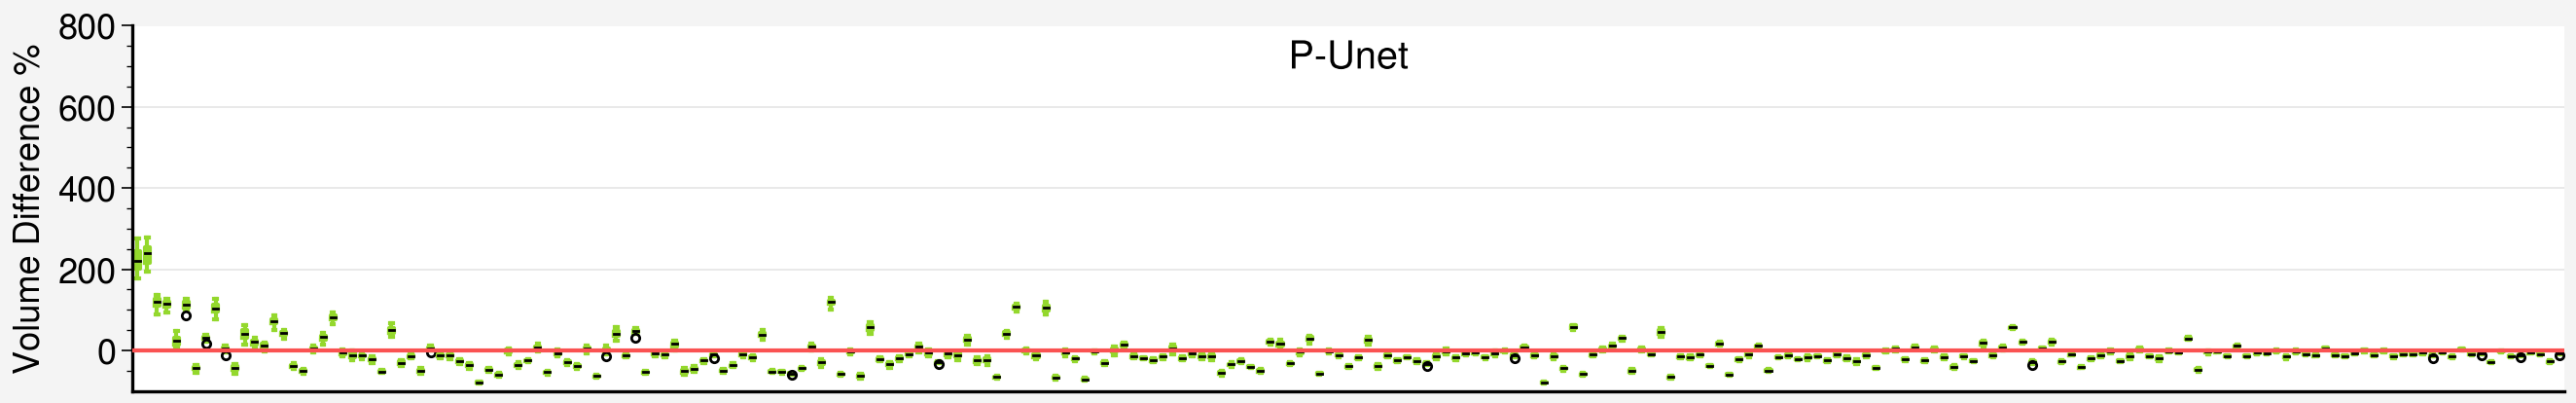

In [61]:
sample_div_plot(in_domain_df, "P-Unet", True, 800, False, "plots_output/sample_div_punet_inhouse.pdf", "100em")

['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means']


Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1245 ticks ([-0.4, ..., 248.4]), which exc

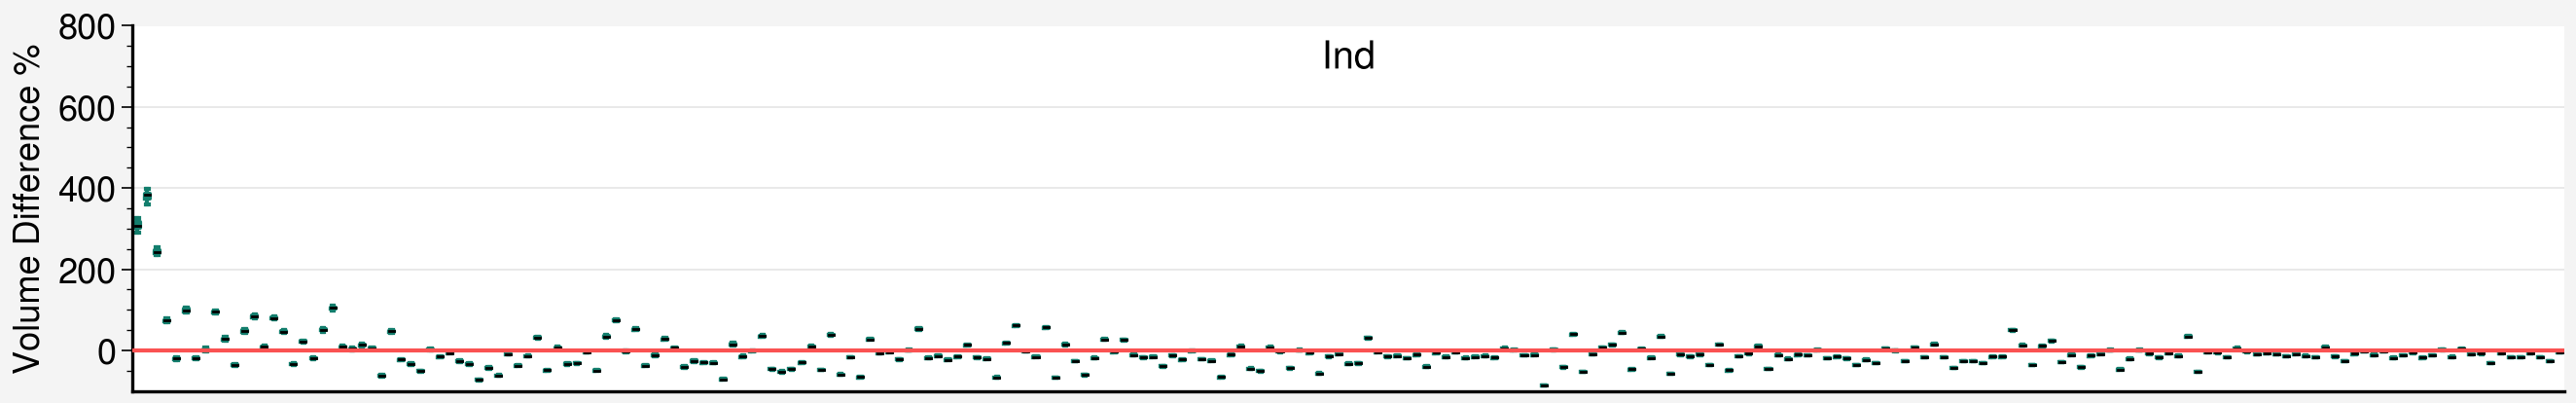

In [62]:
sample_div_plot(in_domain_df, "Ind", True, 800, False, "plots_output/sample_div_ind_inhouse.pdf", "100em")

In [63]:
in_domain_df[(in_domain_df['uncertainty_type']=='P-Unet') & (in_domain_df['dice'] < 0.2)]

Empty DataFrame
Columns: [Unnamed: 0, dice, hd95, avd, recall, f1, rmse, gt_vols, p_acc_cert_0.00, p_uncert_inacc_0.00, pavpu_0.00, p_acc_cert_0.01, p_uncert_inacc_0.01, pavpu_0.01, p_acc_cert_0.02, p_uncert_inacc_0.02, pavpu_0.02, p_acc_cert_0.03, p_uncert_inacc_0.03, pavpu_0.03, p_acc_cert_0.04, p_uncert_inacc_0.04, pavpu_0.04, p_acc_cert_0.05, p_uncert_inacc_0.05, pavpu_0.05, p_acc_cert_0.06, p_uncert_inacc_0.06, pavpu_0.06, p_acc_cert_0.07, p_uncert_inacc_0.07, pavpu_0.07, p_acc_cert_0.08, p_uncert_inacc_0.08, pavpu_0.08, p_acc_cert_0.09, p_uncert_inacc_0.09, pavpu_0.09, p_acc_cert_0.10, p_uncert_inacc_0.10, pavpu_0.10, p_acc_cert_0.11, p_uncert_inacc_0.11, pavpu_0.11, p_acc_cert_0.12, p_uncert_inacc_0.12, pavpu_0.12, p_acc_cert_0.13, p_uncert_inacc_0.13, pavpu_0.13, p_acc_cert_0.14, p_uncert_inacc_0.14, pavpu_0.14, p_acc_cert_0.15, p_uncert_inacc_0.15, pavpu_0.15, p_acc_cert_0.16, p_uncert_inacc_0.16, pavpu_0.16, p_acc_cert_0.17, p_uncert_inacc_0.17, pavpu_0.17, p_acc_cert_0.18, p_uncert_inacc_0.18, pavpu_0.18, p_acc_cert_0.19, p_uncert_inacc_0.19, pavpu_0.19, p_acc_cert_0.20, p_uncert_inacc_0.20, pavpu_0.20, p_acc_cert_0.21, p_uncert_inacc_0.21, pavpu_0.21, p_acc_cert_0.22, p_uncert_inacc_0.22, pavpu_0.22, p_acc_cert_0.23, p_uncert_inacc_0.23, pavpu_0.23, p_acc_cert_0.24, p_uncert_inacc_0.24, pavpu_0.24, p_acc_cert_0.25, p_uncert_inacc_0.25, pavpu_0.25, p_acc_cert_0.26, p_uncert_inacc_0.26, pavpu_0.26, p_acc_cert_0.27, p_uncert_inacc_0.27, pavpu_0.27, p_acc_cert_0.28, p_uncert_inacc_0.28, pavpu_0.28, p_acc_cert_0.29, p_uncert_inacc_0.29, pavpu_0.29, p_acc_cert_0.30, p_uncert_inacc_0.30, ...]
Index: []

[0 rows x 935 columns]

In [64]:
out_domain_df[(out_domain_df['uncertainty_type']=='P-Unet') & (out_domain_df['dice'] < 0.2)]

Unnamed: 0  dice    hd95     avd  recall   f1  rmse  gt_vols   
52          52  0.15 2.1e+01 4.7e+02    0.48 0.38  0.83    5e+02  \
52          52  0.15 1.9e+01 4.7e+02    0.55 0.49  0.88    5e+02   
52          52  0.14 2.1e+01 5.6e+02    0.48 0.39  0.91    5e+02   

    p_acc_cert_0.00  p_uncert_inacc_0.00  ...  voxelwise_tfpr_0.90   
52             0.00                 1.00  ...                  NaN  \
52             0.00                 1.00  ...                  NaN   
52             0.00                 1.00  ...                  NaN   

    voxelwise_tfpr_0.91  voxelwise_tfpr_0.92  voxelwise_tfpr_0.93   
52                  NaN                  NaN                  NaN  \
52                  NaN                  NaN                  NaN   
52                  NaN                  NaN                  NaN   

    voxelwise_tfpr_0.94  voxelwise_tfpr_0.95  voxelwise_tfpr_0.96   
52                  NaN                  NaN                  NaN  \
52                  NaN                  NaN                  NaN   
52                  NaN                  NaN                  NaN   

    voxelwise_tfpr_0.97  voxelwise_tfpr_0.98  voxelwise_tfpr_0.99  
52                  NaN                  NaN                  NaN  
52                  NaN                  NaN                  NaN  
52                  NaN                  NaN                  NaN  

[3 rows x 1035 columns]

In [65]:
np.isnan(in_domain_df['rmse'].values).sum()

2000

In [66]:
in_domain_df.loc[np.isnan(in_domain_df['rmse'].values)]

Unnamed: 0  dice  hd95  avd  recall  f1  rmse  gt_vols  p_acc_cert_0.00   
0            0   NaN   NaN  NaN     NaN NaN   NaN      NaN              NaN  \
1            1   NaN   NaN  NaN     NaN NaN   NaN      NaN              NaN   
2            2   NaN   NaN  NaN     NaN NaN   NaN      NaN              NaN   
3            3   NaN   NaN  NaN     NaN NaN   NaN      NaN              NaN   
4            4   NaN   NaN  NaN     NaN NaN   NaN      NaN              NaN   
..         ...   ...   ...  ...     ...  ..   ...      ...              ...   
35          35   NaN   NaN  NaN     NaN NaN   NaN      NaN              NaN   
36          36   NaN   NaN  NaN     NaN NaN   NaN      NaN              NaN   
37          37   NaN   NaN  NaN     NaN NaN   NaN      NaN              NaN   
38          38   NaN   NaN  NaN     NaN NaN   NaN      NaN              NaN   
39          39   NaN   NaN  NaN     NaN NaN   NaN      NaN              NaN   

    p_uncert_inacc_0.00  ...  sample_4_vd  sample_5_vd  sample_6_vd   
0                   NaN  ...          NaN          NaN          NaN  \
1                   NaN  ...          NaN          NaN          NaN   
2                   NaN  ...          NaN          NaN          NaN   
3                   NaN  ...          NaN          NaN          NaN   
4                   NaN  ...          NaN          NaN          NaN   
..                  ...  ...          ...          ...          ...   
35                  NaN  ...          NaN          NaN          NaN   
36                  NaN  ...          NaN          NaN          NaN   
37                  NaN  ...          NaN          NaN          NaN   
38                  NaN  ...          NaN          NaN          NaN   
39                  NaN  ...          NaN          NaN          NaN   

    sample_7_vd  sample_8_vd  sample_9_vd  GED^2  best_recall  best_precision   
0           NaN          NaN          NaN    NaN          NaN             NaN  \
1           NaN          NaN          NaN    NaN          NaN             NaN   
2           NaN          NaN          NaN    NaN          NaN             NaN   
3           NaN          NaN          NaN    NaN          NaN             NaN   
4           NaN          NaN          NaN    NaN          NaN             NaN   
..          ...          ...          ...    ...          ...             ...   
35          NaN          NaN          NaN    NaN         0.75             6.5   
36          NaN          NaN          NaN    NaN         0.70             3.6   
37          NaN          NaN          NaN    NaN         0.42             4.1   
38          NaN          NaN          NaN    NaN         0.58         1.7e+01   
39          NaN          NaN          NaN    NaN         0.80            2.00   

    V2GED^2  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
..      ...  
35     0.66  
36     0.67  
37     1.02  
38     0.92  
39     0.46  

[2000 rows x 935 columns]

### Results generating and Plotting left to do
- [x] URGENT: fix the problem with the dfs not loading properly (sample stuff in the SEnt rows....)
- [x] run experiment to get missing result for sent in domain
- [x] collect the number of samples experiment in domain and out of domain. Done (in domain only)
- [x] create a new slurm script for the a40 gpus only to run the above with.
- [x] order the samples in terms of dice and reorder to see how that affects best dice and rmse. Nice. No, we can't know dice at test time. Ah but it might still be interesting anyway.....
- [x] see how best dice and best avd is affected as the number of samples increases (a separate experiment here).
- [x] replace best dice with the dice attained by the best dice samples put together. That makes a lot more sense and will make SSN Ens stand out more.
- [x] what happens as I increase the number of samples? (e.g rerun the analysis with 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100 samples...)
- [x] modify code to be able to collect cv5 for the Challenge dataset. Noice.
- [x] find for which methods there are individuals with extremely low dice (broken image) and remove them from the analysis.
- [x] collect cv5 for the challenge dataset
- [x] do the line plots with points, side by side for comparison, as opposed to avoiding putting the points. (instead I just compared punet vs ssn ens)
- [x] add the dashed line that miguel recommends to the proportion of missed lesions plot.
- [x] fix evid
- [x] plot sample div skew
- [x] try using sample diversity as a metric for predicting fazekas, just that on top of clinical values. Then when that is done, compare to using all the features.
- [x] put the dice values for SSN Ens into the deterministic model when doing the quality control experiment, so that we can make a comparison? (and go vice versa).
- [x] can GED be > 1 ? (yes it can)
- [x] fix why the rmse is sometimes nan.
- [ ] provide a visual example that shows why P-Unet will have a better sUEO but a worse calibration for a low volume individual. Find the lowest volume and demonstrate.
- [x] sample VD per volume
- [x] fix the fact that SEnt has some sample based values in the out_domain dataframe...
- [x] rmse per volume
- [ ] estimate the brier score, accuracy, precision of the fazekas models for reporting and confidence intervals in each. NOICE. show confusion matrices.
- [ ] repeat fazekas experiment for multiple runs of the uncertainty maps...
- [x] is pavpu broken? ssn ens has higher p_acc_cert and p_uncert_inacc but lower pavpu? No, its just pavpu denominator contains p_au, which is higher for SSN Ens
    so it's distribution is less tight around the mistakes, so preferences are based on desired outcome for uncertainty.
- [x] plot the covereage metrics as maximum UEO for each method (actually I've gone for UEO at a specific point).
- [ ] provide some visual examples of the differences.
- [ ] get some images that visualise the sample diversity on offer. Nice. maybe do some image crops? I like that.
- [x] make the plots look beautiful please.
- [ ] Matthews correlation for fazekas?

In [67]:
out_domain_df.to_csv("out_domain_df.csv")